# all-MiniLM-L6-v2

In [241]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt

In [242]:
# Expand the same realistic receipt-style generation to all categories
import pandas as pd
import random
from datetime import datetime, timedelta

# Enhanced receipt-like entries for all categories
receipt_expanded = {
    "food": [
        "MC BIG MAC",
        "MC QTR POUNDER",
        "MCCHICKEN",
        "MC FISH FILET",
        "MC NUGGETS 10PC",
        "MC FRIES LG",
        "MC MCFLURRY OREO",
        "BK WHOPPER",
        "BK CHKN FRIES",
        "BK IMP WHOPPER",
        "BK ONION RINGS",
        "WENDY DAVE SINGLE",
        "WENDY BACONATOR",
        "WENDY CHKN SAND",
        "WENDY NUGGETS 6PC",
        "TB CRUNCHY TACO",
        "TB BURRITO SUP",
        "TB QUESADILLA CHK",
        "CFA CHKN SAND",
        "CFA SPICY CHKN",
        "CFA NUGGETS 8CT",
        "KFC ORIG CHKN",
        "KFC EXTRA CRISPY",
        "KFC FAMOUS BOWL",
        "PH PEP PIZZA MED",
        "PH SUPREME PIZZA",
        "PH STUFF CRUST",
        "INN DOUBLE-DOUBLE",
        "INN ANIMAL FRIES",
        "FG BACON CHSBGR",
        "FG CAJUN FRIES",
        "CHIPOTLE BURRITO",
        "CHIPOTLE BOWL CHK",
        "CHIPOTLE TACO 3PC"
        "MILK 1GAL",
        "PEANUT BTR 16OZ",
        "FZ FRIES 16OZ",
        "NN MUSHROOM",
        "LIME LB",
        "NAT BACON LB",
        "TGT SALMON 5LB",
        "GEN CHIPS 12OZ",
        "CORN 12OZ",
        "TUNA CAN 8OZ",
        "OIL 32OZ",
        "MAC & CHEESE",
        "LASAGNA",
        "GRAPE JCE 64OZ",
        "TOMATO SAU 16OZ",
        "TGT APPLE JCE 1L",
        "PORK LB",
        "BBQ SAU 16OZ",
        "GV PASTA 16OZ",
        "ORNG JCE 2L",
        "SHRIMP LB",
        "CUCUMBR LB",
        "CEREAL 16OZ",
        "SPINACH 1LB",
        "TGT HOT SAU 5OZ",
        "TRDR GRAPES LB",
        "NN SPINACH 1LB",
        "YOGURT 500ML",
        "CHOC BAR",
        "NV BAGEL 6CT",
        "ANN SOUP 16OZ",
        "GV OATS 16OZ",
        "PEANUT 10PK",
        "NN JAM 8OZ",
        "BACON LB",
        "FV CHOC 100G",
        "GV CHEESE 8OZ",
        "WM WATER 2L",
        "PINEAPP EA",
        "GEN CELERY LB",
        "HYV MUSTARD 8OZ",
        "PEPPER 5LB",
        "WB PASTA 1LB",
        "WHLFD OLIVE OIL 1L",
        "WG CEREAL",
        "CHICKEN 8PC",
        "LM SALMON 1LB",
        "FZ PEAS 16OZ",
        "PC CARROT 2LB",
        "ONION LB",
        "NAT POTATO 5LB",
        "HOT SAU 8OZ",
        "TRDR ONION LB",
        "NN HAM 1LB",
        "WM SPINACH 1LB",
        "LDL YOGURT 16OZ",
        "PEPPER",
        "LDL CHEESE 8OZ",
        "PEACH LB",
        "SANDWICH",
        "GV SALMON CAN",
        "GV COFFEE 16OZ",
        "NN OATS",
        "SNACK MIX",
        "POTATO 5LB",
        "CHKN LB",
        "PEAS 24OZ",
        "SALT 500G",
        "ANN CHEESE 8OZ",
        "HV PEAS 1LB",
        "GRAPES LB",
        "SMPL MILK 1GAL",
        "SOUP",
        "MANGO LB",
        "MACARONI 5LB",
        "GUM 6PK",
        "WM BREAD",
        "WHLFD CHEESE 8OZ",
        "WATER 1L",
        "SALSA 12OZ",
        "SMPL YOGURT 500ML",
        "KRG BACON",
        "ICE CREAM 1GAL",
        "BRD 2PK",
        "CHOC 100G",
        "MUSHROOM LB",
        "PSTA SAU 24OZ",
        "BRD",
        "GV LETTUCE",
        "ANN KETCHUP 16OZ",
        "HYV OATS 500G",
        "ORNG JCE 500ML",
        "ORG BEANS 16OZ",
        "BEANS 8OZ",
        "NN JAM",
        "KRG BEER 6PK",
        "NN ORNG JCE 64OZ",
        "MILK SOY 1GAL",
        "TOFU",
        "MEATBALLS",
        "SPAG 1LB",
        "HM HONEY 8OZ",
        "WM PICKLES 16OZ",
        "TRDR BANANA LB",
        "NR SALSA",
        "MILK 2L",
        "JELLY 12OZ",
        "NL HOT DOG",
        "ANN BROCCOLI LB",
        "NM CHEESE 1LB",
        "CHERRY LB",
        "TS EGG 12CT",
        "PSTA SAU 16OZ",
        "FISH LB",
        "SPAG 2LB",
        "TGT SUGAR 5LB",
        "NN SPAG 1LB",
        "GV KETCHUP 20OZ",
        "PICKLES 12OZ",
        "ORG PEACH LB",
        "SALT",
        "RICE 5LB",
        "GV SYRUP 24OZ",
        "SMPL RICE 5LB",
        "WHLFD MILK 1GAL",
        "CORN 24OZ",
        "GV RICE 5LB",
        "WATERMLN 3LB",
        "COFFEE 16OZ",
        "NN WINGS LB",
        "GUM",
        "BBQ SAU 8OZ",
        "OATS 16OZ",
        "WALMT MILK 1GAL",
        "LEMON EA",
        "LETTUCE",
        "KRG BROTH 1L",
        "HOT SAU 5OZ",
        "GV OIL 1GAL",
        "WHLFD RICE 2LB",
        "CORNFLK 16OZ",
        "COKE 2L",
        "NN PEAS 16OZ",
        "BBQ SAU 12OZ",
        "CHOC",
        "BB SALMON 2LB",
        "PSTA SAU 32OZ",
        "LEMON LB",
        "GV SALSA 16OZ",
        "ICE CREAM 16OZ",
        "RAISINS",
        "BEEF",
        "FZ VEG 1LB",
        "LAMB LB",
        "SPICE",
        "ASPARAGUS LB",
        "SPINACH",
        "GV ONION LB",
        "CND VEG 12OZ",
        "WATER 2L",
        "LDL MILK 1GAL",
        "NAT ICE CRM 1GAL",
        "PEANUT 8OZ",
        "CHICKEN 2LB",
        "TOFU 16OZ",
        "GV FLOUR 5LB",
        "HV MILK 1GAL",
        "ORG BREAD",
        "WHLFD PIZZA SL",
        "PEPPER 8OZ",
        "HOT DOG",
        "GREEN BEAN LB",
        "PIZZA SL",
        "FLOUR 5LB",
        "FRIES",
        "GV SUGAR 2LB",
        "CELERY LB",
        "TRDR APPLE JCE 2L",
        "RAMEN",
        "WHLFD POTATO 5LB",
        "WM BEEF 2LB",
        "GARLIC",
        "FRUIT CUP",
        "COFFEE 1L",
        "LEMONADE",
        "PEANUT BTR",
        "NN PIZZA 4PK",
        "NN MILK 1GAL",
        "ORNG JCE",
        "CHIPS 12OZ",
        "HOT SAU 10OZ",
        "LETTUCE 1EA",
        "TEA",
        "WINGS LB",
        "LAMB",
        "GV WATER 1GAL",
        "PEAS 16OZ",
        "PORK CHOP LB",
        "SOUP 16OZ",
        "SMPL CEREAL",
        "TURKEY LB",
        "SMPL RICE 2LB",
        "TS BEEF 1LB",
        "GV CHKN 1LB",
        "TUNA CAN 16OZ",
        "GM ICE CREAM",
        "CHIPS 8OZ",
        "ALB CHIPS",
        "LEMON",
        "OLE SALSA 8OZ",
        "BACON 12OZ",
        "WM BEANS 16OZ",
        "GL BROTH 1L",
        "TRDR FZ VEG 1LB",
        "NN CND VEG",
        "ORNG JCE 1L",
        "WALMT BREAD",
        "SMPL OATS 500G",
        "CHEESE 8OZ",
        "GV ORANGE",
        "ANN STEAK LB",
        "BEEF LB",
        "CHEESECAKE",
        "TRDR BEEF LB",
        "ORNG JCE 64OZ",
        "CRACKER 8OZ",
        "LETTUCE 1LB",
        "NAT CEREAL 12OZ",
        "SUGAR 2LB",
        "GV SHRIMP 1LB",
        "SUGAR 5LB",
        "WM COKE 2L",
        "CND FRUIT 12OZ",
        "WM LETTUCE",
        "OIL OLIVE 1L",
        "PC APPLE 3LB",
        "WHOLE CHKN 5LB",
        "BELG WAF",
        "BANANA LB",
        "CANDY BAR",
        "GUM 200G",
        "ANN MILK 1GAL",
        "PEPSI 2L",
        "GS CHIPS 16OZ",
        "SAUSAGE LB",
        "GV FZ FRIES 16OZ",
        "EGGS 12CT",
        "FZ SHRIMP 1LB",
        "WALMT RICE 5LB",
        "WHLFD SALMON 2LB",
        "CHKN",
        "VINEGAR 500ML",
        "NN FZ VEG 1LB",
        "LDL PIZZA 2PK",
        "LIME",
        "GV POTATO 10LB",
        "NN RICE 2LB",
        "LDL EGG 12CT",
        "PEANUT 10OZ",
        "HYV BANANA LB",
        "LEMON 2LB",
        "VEG OIL 1GAL",
        "SOY SAU 10OZ",
        "MAYO 8OZ",
        "RAMEN 3PK",
        "WM ONION 2LB",
        "TGT BROTH 1L",
        "HP LASAGNA",
        "TRDR BACON",
        "CREAM CHS 8OZ",
        "APPLE SAUCE",
        "HOTDOG LB",
        "ORG OLIVE OIL 500ML",
        "CARROT LB",
        "ARUGULA",
        "GV BEANS 16OZ",
        "GAL SUGAR 4LB",
        "ALB LETTUCE",
        "NN FLOUR 5LB",
        "LDL RICE 5LB",
        "LDL SALSA 16OZ",
        "WATER 500ML",
        "OLIVES 8OZ",
        "WHLFD CHEESE",
        "LF MILK 1GAL",
        "CORN",
        "WATER",
        "NAT SODA 2L",
        "NN CHOC",
        "LDL LETTUCE",
        "AUSTL BEEF LB",
        "ANN CHIPS 8OZ",
        "ALB TEA 500ML",
        "APRICOT LB",
        "BB SANDWICH",
        "PIZZA",
        "GV MILK 1GAL",
        "WALMT OIL 1GAL",
        "LIME EA",
        "ANN PIZZA 4PK",
        "LEMON JUICE",
        "CIDER",
        "WM CND FRUIT 16OZ",
        "ASSTD CEREAL",
        "GV PASTA 1LB",
        "ALB BANANA LB",
        "WM SALSA 16OZ",
        "ALMD MILK",
        "SS HOTDOG",
        "ENERGY DRK 500ML",
        "HYV FLOUR 5LB",
        "GEN FLOUR 2LB",
        "NN GRAPES 2LB",
        "COFFEE 12OZ",
        "WM PANCAKE MX 32OZ",
        "LDL CHIPS 12OZ",
        "PEANUT BTR 16OZ",
        "NV SPINACH",
        "RIBS LB",
        "NN CHEESE 8OZ",
        "CELERY",
        "PSL BEANS",
        "WINGS",
        "COLESLAW",
        "LDL CORNFLK 16OZ",
        "GE PIZZA 2PK",
        "ORG HONEY 8OZ",
        "TRDR AVOCADO",
        "NAT PIZZA 4PK",
        "TRDR CND FRUIT",
        "COKE 500ML",
        "BEEF 2LB",
        "SMPL WHIP CRM 500ML",
        "OLIVE OIL 500ML",
        "CHIPS 200G",
        "ASSTD VEG",
        "TRDR FZ CORN 1LB",
        "NAPKINS",
        "WHLFD CORN 2LB",
        "PEANUT BTR 32OZ",
        "CHKN BROTH 1L",
        "BEEF BROTH 1L",
        "PSL BEEF LB",
        "WM CHICKEN 2LB",
        "WALMT YOGURT 6OZ",
        "TRDR MILK ALMD",
        "POM PASTA 16OZ",
        "SAUSAGE",
        "NN FLOUR 2LB",
        "CANDY 4OZ",
        "ANT CND VEG",
        "SODA 2L",
        "NN SALSA 12OZ",
        "WHLFD OLIVES",
        "BROTH 1L",
        "FLOUR 2LB",
        "LB BROTH 1L",
        "SS EGG 12CT",
        "ANN FZ PIZZA 4PK",
        "WF RICE 2LB",
        "NN YOGURT",
        "FRIES 16OZ",
        "LDL CHKN 2LB",
        "WHLFD ORNG JCE",
        "WALMT CHEESE 8OZ",
        "VG MILK 1GAL",
        "AVOCADO",
        "LDL SODA 2L",
        "MIX VEG",
        "SOY SAU 16OZ",
        "KRG PEAS 16OZ",
        "TRDR HAM 1LB",
        "NV SALMON 2LB",
        "FRZN PIZZA",
        "GV SALMON 2LB",
        "NAT MILK 1GAL",
        "BUTTER 1LB",
        "BACON",
        "TRDR LETTUCE",
        "TGT BREAD",
        "TUNA 5OZ",
        "CORN 16OZ",
        "FV SALSA 16OZ",
        "YOG GREEK 500ML",
        "WHLFD LEMON LB",
        "NN FZ FRIES",
        "COFFEE",
        "ASSTD FRUIT",
        "WM MILK ALMD",
        "CHEESE 16OZ",
        "HOT SAU 12OZ",
        "FLR TORTILLAS",
        "MILK 500ML",
        "TRDR MUSTARD 8OZ",
        "PORK 2LB",
        "NN MILK ALMD",
        "NAT CHOC",
        "BB POTATO 5LB",
        "NN TOMATO LB",
        "PORK LB",
        "WF BROTH 1L",
        "RICE 1LB",
        "RICE 2LB",
        "SALSA 8OZ",
        "NAT JAM 8OZ",
        "GARLIC LB",
        "WALMT MUSTARD 8OZ",
        "HYV CEREAL",
        "TRDR FLOUR 2LB",
        "LEMON 1EA",
        "ENERGY DRK",
        "SUGAR 1LB",
        "PSL SHAMPOO",
        "SPARKLING",
        "GV OLIVES 8OZ",
        "ORG BEEF 1LB",
        "GINGER LB",
        "HYV MAYO 12OZ",
        "GV BEEF 1LB",
        "BEEF 1LB",
        "WM TUNA CAN",
        "NN POTATO 5LB",
        "CRACKER",
        "PINEAPP",
        "LDL BEEF 1LB",
        "BURGER",
        "SMPL CHKN LB",
        "HOT DOG",
        "WHLFD PORK LB",
        "ANN RICE 2LB",
        "WHLFD BANANA",
        "PEPPERS LB",
        "PENNE 16OZ",
        "SMPL SALSA 16OZ",
        "LDL POTATO 5LB",
        "TGT PICKLES 16OZ",
        "CELERY 1LB",
        "COLESLAW 1LB",
        "GV BROTH 32OZ",
        "WHLFD SALSA 8OZ",
        "ANN SUGAR 2LB",
        "GN SODA 500ML",
        "NN ORNG JCE",
        "ORNG JCE 1GAL",
        "CHOC COOKIES",
        "SUB 6IN",
        "CHIPS 16OZ",
        "CHIPS",
        "PRTZ",
        "TGT FLOUR 5LB",
        "NAT CHIPS 8OZ",
        "PORKCHOP LB",
        "LDL BROCCOLI",
        "LEMON 5LB",
        "FZ CORN 16OZ",
        "ONION 2LB",
        "SUB 12IN",
        "TRDR CEREAL 12OZ",
        "LIME 2LB",
        "PUFF PASTRY",
        "ANN YOGURT 6OZ",
        "FZ PIZZA 2PK",
        "ALB SODA 2L",
        "YOGURT 6OZ",
        "APRICOT CAN",
        "NN OIL 1GAL",
        "LT CHICKEN LB",
        "WHEAT BREAD",
        "GV HAM 1LB",
        "TGT OLIVES 8OZ",
        "ANN MILK ALMD",
        "NS CELERY",
        "NP CHEESE 16OZ",
        "LB SALMON 2LB",
        "PEARS",
        "TRDR PASTA 1LB",
        "PUFFS",
        "ORNG JCE 12OZ",
        "RAISINS 20CT",
        "SOUP BWL",
        "OLDNV SALMON",
        "FISH",
        "CVS WATER 1GAL",
        "OIL 1GAL",
        "KNORR MASH",
        "POMEGRNT",
        "LDL BANANA",
        "NN BANANA",
        "WALMT SALSA 16OZ",
        "KRG CHIPS",
        "CHKN 8OZ",
        "JAM 8OZ",
        "SPARKLING 1L",
        "SODA 500ML",
        "TS POTATO LB",
        "GO CHEESE",
        "GV YOGURT",
        "PORK 1LB",
        "SOAP 3PK",
        "GV TEA 500ML",
        "LDL ONION 2LB",
        "GUACAMOLE",
        "ANN ICE CREAM",
        "GRAPE JCE 1L",
        "FS MILK 1GAL",
        "WALMT CORN 16OZ",
        "TRDR GUM 200G",
        "NN OLIVE OIL 500ML",
        "FZ MEAL",
        "YU BEER 6PK",
        "CHILI 16OZ",
        "GEN MILK 1GAL",
        "GEN BREAD",
        "WM BANANA LB",
        "CF CRACKER",
        "SODA 12PK",
        "TGT OATS",
        "PSL MILK 1GAL",
        "WALMT CHIPS",
        "ANN POTATO 5LB",
        "WHLFD ORANGE",
        "WHLFD CHIPS",
        "NV PASTA 16OZ",
        "TRDR CHIPS 8OZ",
        "NN GRAPES LB",
        "NN CHKN LB",
        "GV CHIPS 8OZ",
        "TRDR PICKLES 12OZ",
        "SS POTATO",
        "TGT CEREAL 12OZ",
        "ALB MILK 1GAL",
        "CHEESE",
        "TRDR BROTH 1L",
        "PEANUT 500G",
        "TGT CND FRUIT",
        "CELERY STALK",
        "GUM 200G",
        "TRDR APPLE 3LB",
        "ANN PINEAPP",
        "NM CHIPS 16OZ",
        "LIME JUICE",
        "WF BEER 6PK",
        "LDL SUGAR 4LB",
        "WM COFFEE 1L",
        "CHEERIOS 14OZ",
        "COOKIES 6CT",
        "FZ CHKN",
        "NN BBQ SAU 12OZ",
        "HYV SUGAR 2LB",
        "WM SODA 2L",
        "NR HOT SAU",
        "APPLE",
        "TGT FLOUR 2LB",
        "PSL SODA",
        "SHREDDED CHS",
        "PINEAPPLE",
        "GEN JAM 8OZ",
        "ONION",
        "GEN MILK ALMD",
        "ORANGE LB",
        "CHKN BROTH",
        "TRDR OATS 500G",
        "WHLFD YOGURT 6OZ",
        "GL MILK 1GAL",
        "WF SODA 2L",
        "PP SODA",
        "WHLFD OLIVE OIL",
        "CAB WINE 750ML",
        "PIZZA 4PK",
        "CHORIZO LB",
        "NN BEEF LB",
        "ZUCCHINI LB",
        "PEANUT 6OZ",
        "TGT CHIPS 12OZ",
        "WM OIL 1GAL",
        "LDL KETCHUP 20OZ",
        "HYV GRAPES LB",
        "LDL BEANS 16OZ",
        "PECANS 8OZ",
        "WM ONION LB",
        "TRDR LETTUCE 1EA",
        "ORNG SODA 2L",
        "GEN CHEESE 8OZ",
        "LDL BANANA LB",
        "GV FZ VEG 1LB",
        "APPLE 3LB",
        "TGT EGGS 12CT",
        "BRD 1PK",
        "ALB BROCCOLI",
        "NN MILK SOY",
        "APPLE JCE 2L",
        "PINEAPP 3LB",
        "LDL BREAD",
        "ALB WATER 1GAL",
        "JUICE",
        "SODA 1L",
        "NN MUSTARD 8OZ",
        "LDL MAYO 8OZ",
        "CN EGG ROLL",
        "CND SOUP",
        "CHEX MIX",
        "BUTTER 2GAL",
        "WM SUGAR 4LB",
        "FISH FILLET",
        "CHIPS 16OZ",
        "YOG 16OZ",
        "ORG SALMON 5LB"
    ],
    "transportation": [
        "TIRE REPAIR",
        "HEADLIGHT",
        "ENTERPR 2DAY",
        "GAS 20GAL",
        "TIRE BALANC",
        "BIKE RENT 1HR",
        "CORE FEE",
        "ZONE PASS",
        "MBTA 1DAY",
        "TOLL PLAZA",
        "TAXI RIDE",
        "AIR PUMP",
        "PAINT TOUCH",
        "VALET PARK",
        "PARKING 5HR",
        "HERTZ 7DAY",
        "WHEEL ALIGN",
        "PARKING 6HR",
        "BUDGET 3DAY",
        "TIRE MOUNT",
        "SPARK PLUG",
        "SHELL GAS",
        "LYFT SHARED",
        "LIRR TICKET",
        "LABOR 3HR",
        "PARKING 3HR",
        "TIRE LR",
        "WHEEL CVR",
        "TIRE RR",
        "AMTRAK TKT",
        "FERRY TICKET",
        "PARKING 12HR",
        "LIMO RENT",
        "MIRROR RH",
        "TNC TRIP",
        "CAR WASH DELUX",
        "TIRE 6CT",
        "MTA WEEKLY",
        "BIKE RENT 2HR",
        "GAS PRM 91",
        "TRUCK RENT",
        "CARB CLEAN",
        "SMOG TEST",
        "PEAK FARE",
        "OIL SYNTH",
        "PARK & RIDE",
        "ALIGN 4WHL",
        "TEAM BUS",
        "OIL 5QT",
        "MTA 1WAY",
        "TIRE CHANGE",
        "TIRE 10CT",
        "SURGE CHG",
        "LIGHT RAIL",
        "BATTERY",
        "GAS 5GAL",
        "TRAIL FEE",
        "CAR RENT 7DAY",
        "BP GAS",
        "BUDGET 2DAY",
        "CAR RENT SEDAN",
        "RENTAL CAR",
        "OIL REG",
        "PARK PERMIT",
        "GAS UNLEADED",
        "DIESEL",
        "AVIS 3DAY",
        "GAS 15GAL",
        "TAXI CAB",
        "GAS MID 89",
        "RENTAL SUV",
        "SERV STATION",
        "BRIDGE TOLL",
        "SMOG CERT",
        "BIKE SHARE",
        "OIL SYN",
        "JUMP START",
        "TOLL 4AXL",
        "TOLL BRIDGE",
        "LONDON TUBE",
        "TRANSIT TKT",
        "UBER RENTAL",
        "GRINDR",
        "ZIPCAR 2HR",
        "BUS PASS",
        "MIRROR LH",
        "ROAD FEE",
        "MTA DAYPASS",
        "DSLR",
        "U-HAUL 1DAY",
        "BRIDGE FEE",
        "TRAIN ZONE3",
        "PARKING DAY",
        "AC SERVICE",
        "PARKING 8HR",
        "PARKING 24HR",
        "BRAKE FLUSH",
        "AIR TICKET",
        "CAR RENT 3DAY",
        "WD-40",
        "ROTARY",
        "BART DAYPASS",
        "PARKING 4HR",
        "VW COOLANT",
        "ASPIRIN 100CT",
        "GEAR OIL",
        "ALIGN 2WHL",
        "BRAKE PAD R",
        "TRANS FLUID",
        "TIRE FEE",
        "BUSHING",
        "VALVOLINE",
        "PARKING TICKET",
        "CHARGE LV2",
        "TURN BLADE",
        "TEAM HOODIE",
        "COOLANT FL",
        "CLOUD KEY",
        "CHAUFFEUR",
        "GAS STATION",
        "METROLINK",
        "OC BUS",
        "WHEEL R&R",
        "BIKE RACK",
        "CRUISE CTR",
        "WASTEWATER",
        "AXLE",
        "CV JOINT",
        "PARKING 7HR",
        "WHEEL NUT",
        "REG WA",
        "SUBWAY TOKEN",
        "GASOLINE",
        "WHEEL WT",
        "TTC TOKEN",
        "TOLL 2AXL",
        "CTA PASS",
        "GREYHND TKT",
        "CAR WASH PREM",
        "I-90 TOLL",
        "TRAM FARE",
        "BART TICKET",
        "PHILLIPS GAS",
        "UNL MILES",
        "BRAKE PAD F",
        "ENGINE OIL",
        "LIMO RIDE",
        "CAB FARE",
        "BRAKE ROTOR",
        "UBER FARE",
        "TIRE LR",
        "OIL SEAL",
        "LUBRICANT",
        "DIY KIT",
        "LEASH",
        "CARDS",
        "TUNE UP",
        "BARNES PASS",
        "TRANSIT 2ZN",
        "FUSE REPL",
        "O2 SENSOR",
        "ELECTR FEE",
        "AC COMP",
        "PAI",
        "LIFT CHG",
        "RADIATOR",
        "ZONE2 FARE",
        "MIRROR RH",
        "COACH TKT",
        "MAF SENSOR",
        "RADIO CODE",
        "BUS 10TRIP",
        "TRAM PASS",
        "LIRR PASS",
        "MTA PASS",
        "DONATION",
        "NIGHT SURCHG",
        "TRAM PASS",
        "POSTAGE",
        "BUS CARD",
        "TIRE",
        "OIL FILTER",
        "UBERX RIDE",
        "NS 4WD",
        "RADIATOR CAP",
        "GUIDE FEE",
        "SCOOTER 30MIN",
        "TRAFFIC CIT",
        "SURGE FEE",
        "DISPOSAL FEE",
        "TOOLS RENT",
        "ZIPCAR 1HR",
        "BRAKE PAD",
        "I-10 TOLL",
        "ZONE3 FARE",
        "HERTZ 3DAY",
        "BIKE RENT 30M",
        "RENTAL VAN",
        "TEMP PASS",
        "BRIDGE PASS",
        "WMATA TKT",
        "UBER BIKE 15M",
        "TNC RIDE",
        "LOCK KEY",
        "ALIGNMENT",
        "TOWING",
        "SERVICE D",
        "BRAKE FLUID",
        "NAT COOLANT",
        "TSLA CHARGE",
        "RENTAL INS",
        "LIFT",
        "OFFPEAK",
        "FLEX TKT",
        "CATBUS PASS",
        "NYC SUBWAY",
        "SCOOTER RENT",
        "SHUTTLE",
        "PEAK TICKET",
        "LV ACCEL",
        "CAB SF",
        "CAB 3AM",
        "TUBE PASS",
        "HHR FEE",
        "MEDIC PASS",
        "TRANSIT FEE",
        "SOC BUS",
        "CORE FEE",
        "OCTANE 87",
        "PARKING 2HR",
        "ROAD TAX",
        "UVT PASS",
        "BIKE PERMIT",
        "CAR RENT SUV",
        "ENTERPR 1DAY",
        "TRADE IN",
        "SIXT 2DAY",
        "TAXI NYC",
        "TRAM DAYPASS",
        "OIL 1QT",
        "IAMSHLTCK6LB",
        "TAXI SF",
        "GB PACFEE",
        "ZWC PASS",
        "TIRE KIT",
        "BUS FARE",
        "ZONE1 FARE",
        "GAS 5L",
        "REFUEL FEE",
        "SCOOTER 15M",
        "TOLL 5AXL",
        "VALET FEE",
        "PARKING FEE",
        "UBER EATS",
        "TIRE ROT",
        "LATE FEE",
        "CAB LA",
        "ACE UNLK",
        "TUNNEL TOLL",
        "RENTAL 7DAY",
        "BUS TICKET",
        "TRAIN ZONE2",
        "GAS 50L",
        "CHARGE FEE",
        "SERV CHG",
        "TAXI CHI",
        "FLIGHT TICKET",
        "OIL 10W40",
        "SPARE TIRE",
        "TRANSIT FARE",
        "BIKE SHARE",
        "GYM FEES",
        "CAB NYC",
        "DELIVERY",
        "PARK VAL",
        "PARK TICKET",
        "GN PACK",
        "SON INSP",
        "GAS 10GAL",
        "RENTAL CAR",
        "GAS 10L",
        "VIN KL1",
        "LSL FEE",
        "TIRE ROTATE",
        "PT TNY",
        "OIL 10W40",
        "SERVICE A",
        "BT HEADPH",
        "TRIM RIDE",
        "CAB SURCH",
        "RS JOINT",
        "MUTE PASS",
        "LOT FEE",
        "FUEL SVC",
        "OIL 1QT",
        "VAS PASS",
        "FUEL SVC",
        "GAS 5L",
        "TOR PASS",
        "EXPRESS BUS",
        "HIGHWAY TOLL",
        "WB MAINT",
        "TYR PASS",
        "RF PASS",
        "CAB POOL",
        "HW INSPECTION",
        "PHONE FEE",
        "GAS UNOIL",
        "CAD FEE",
        "PARKING 8HR",
        "BIKE ZONE",
        "TRANSIT PASS",
        "OIL 1QT",
        "GAS UNOIL",
        "ZE PASS",
        "PEAK PASS",
        "FARE ADULT",
        "NIL PASS",
        "BUS PASS",
        "CAR RENT 2DAY",
        "IC PASS",
        "SCOOT PASS",
        "EXP PASS",
        "CHARGE LV3",
        "KCH PASS",
        "CAR WASH BASIC",
        "AIR FILTER",
        "BIKE SHARE",
        "GAS 10GAL",
        "ENTERPR 2DAY",
        "ROADSIDE ASST",
        "AC FILTER",
        "VR PASS",
        "GAS UNOIL",
        "LTR PASS",
        "GEN PASS",
        "LATE FEE",
        "EXTRA MI",
        "SURCH PASS",
        "CAB SF",
        "SCOOT PASS",
        "ZONE3 PASS",
        "TRANSIT DAYPASS",
        "PVC PASS",
        "PS PASS",
        "GEN PASS",
        "CAB LA",
        "GAS UNOIL",
        "LATE FEE",
        "CAB FEE",
        "UBER RIDE",
        "TIRE RR",
        "TNC PASS",
        "CAR RENTAL",
        "ENGINE OIL",
        "LABOR HR",
        "GAS STATION",
        "DIESEL 10L",
        "LEV PASS",
        "DS PASS",
        "LR PASS",
        "MC PASS",
        "CB PASS",
        "LYFT LUX",
        "CAR RENTAL",
        "TOW FEE",
        "TRANSIT PASS",
        "SERVICE FEE",
        "TIRE 6CT",
        "FUEL PUMP",
        "RAIL FARE",
        "UNL MILES",
        "WM PASS",
        "RADIATOR FL",
        "KIT PASS",
        "PP PASS",
        "AX PASS",
        "KB PASS",
        "BUS MONTHLY",
        "U-HAUL 1DAY",
        "PARKING 24HR",
        "PARKING OVERNT",
        "LABOR 2HR",
        "PARKING 3HR",
        "ENTERPR 2DAY",
        "CORE FEE",
        "TSLA CHARGE",
        "PEST SPRAY",
        "ALLIG PASS",
        "BRL PASS",
        "EX PASS",
        "PARK PASS",
        "INSPECTION",
        "TR PASS",
        "BT PASS",
        "CV PASS",
        "PARK PASS",
        "RV PASS",
        "LV PASS",
        "RL PASS",
        "TR PASS",
        "DY PASS",
        "ZIP PASS",
        "DRILL BIT",
        "ALIGN 2WHL",
        "TAXI FARE",
        "LUG NUT",
        "ME PASS"
    ],
    "clothing": [
        "ADI SNEAKER 8",
        "SHIRT BLU XS",
        "TANK M",
        "LEGGING S",
        "ADI HOODIE XL",
        "LS SHIRT XL",
        "JEANS 36",
        "OLDNV SWEATER L",
        "SOCKS M 6PK",
        "JKT L",
        "SOCKS M 10PK",
        "ZRA JKT M",
        "GLOVES S",
        "TSHIRT L",
        "CARGO SHORTS 34",
        "PANTY M 5PK",
        "NK HAT",
        "DRESS M",
        "BELT XL",
        "CAP BLK L",
        "COAT L",
        "HM PANTS 32",
        "PUFFER JKT M",
        "SCARF",
        "TSHIRT M",
        "BOXER L 3PK",
        "DRESS S",
        "SWEATER M",
        "GLOVES M",
        "LEVI JEANS 34",
        "JACKET XL",
        "ZRA BOOTS 9",
        "H&M HOODIE M",
        "BELT M",
        "POLO S",
        "CAP M",
        "BLAZER S",
        "WATCH",
        "BRACELET",
        "HAT L",
        "COAT M",
        "NK TANK M",
        "LEVI JACKET M",
        "VEST M",
        "HAT S",
        "OLDNV POLO L",
        "HOODIE BLK XL",
        "SHORTS 30",
        "SHOES 8",
        "ADI CAP",
        "JACKET L",
        "SHOES 10",
        "CAP L",
        "JKT S",
        "TROUSER 32",
        "JACKET M",
        "COAT S",
        "NK TSHIRT XL",
        "SHORTS 34",
        "DRESS XS",
        "ZRA SWEATER M",
        "TSHIRT XL",
        "SWEATER S",
        "SNEAKER 9",
        "SKIRT M",
        "NECKLACE",
        "PUMA SHIRT L",
        "SHORTS L",
        "NK JACKET L",
        "LEVI JEANS 32",
        "JEANS 30",
        "GAP HOODIE M",
        "VEST L",
        "POLO L",
        "SOCKS L",
        "LS TEE M",
        "LEGGING L",
        "BELT L",
        "HOODIE S",
        "HAT M",
        "UA SHOES 11",
        "SWTR L",
        "CAP XL",
        "NK SHORTS M",
        "JACKET M",
        "HM DRESS L",
        "AE JEANS 32",
        "DRESS XL",
        "RING 8",
        "SKIRT L",
        "SHOES 12",
        "POLO M",
        "SCARF GRY",
        "SHIRT XL",
        "TSHIRT S",
        "GLOVES L",
        "UA CAP",
        "JACKET S",
        "AE SHORTS 34",
        "COAT XL",
        "AE VEST M",
        "ADI SNEAKER 10",
        "LEGGING M",
        "TRUNK M",
        "SHOES 7",
        "BLAZER M",
        "DENIM JKT L",
        "BLAZER L",
        "TSHIRT M 5PK",
        "BOXER M 3PK",
        "NK SHOES 9",
        "SHIRT M",
        "PANTY L 5PK",
        "UA POLO S",
        "GAP SHIRT M",
        "BELT S",
        "NK SWEATER S",
        "DRESS L",
        "SHOES 9",
        "ADI HOODIE L",
        "SANDAL 9",
        "COAT M",
        "TSHIRT XS",
        "GLOVES XL",
        "BRA 36C",
        "TSHIRT M 3PK",
        "VEST XL",
        "SKIRT S",
        "LEVI JEANS 30",
        "TRUNK L",
        "JKT M",
        "JKT XL",
        "LEGGING XL",
        "UA JACKET M",
        "COAT M",
        "SANDAL 8",
        "HAT BLU M",
        "JACKET L",
        "SHIRT L",
        "OLDNV JEANS 34",
        "UA SWEATER L",
        "AE SHIRT S",
        "SS SHIRT L",
        "TSHIRT L 3PK",
        "JEANS 40",
        "SOCKS XL",
        "ADI CAP",
        "VEST S",
        "BRA 34B",
        "UA HOODIE XL",
        "SHIRT S",
        "TSHIRT XXL",
        "SNEAKER 11",
        "PUFFER JKT XL",
        "H&M SKIRT M",
        "NK POLO L",
        "H&M HAT",
        "SHORTS M",
        "LS SWEATER L",
        "LS POLO S",
        "LEVI JACKET L",
        "JACKET XS",
        "JEANS 32",
        "HOODIE M",
        "GLOVES M",
        "VEST XS",
        "LEVI SHORTS 32",
        "SWTR M",
        "SHIRT M",
        "SHIRT M",
        "JACKET M",
        "SWEATER L",
        "SHIRT S",
        "JEANS 28",
        "SWEATER XL",
        "POLO XL",
        "SHORTS XL",
        "TSHIRT XL",
        "COAT L",
        "SHOES 11",
        "BOOTS 10",
        "H&M JEANS 30",
        "BRA 34B",
        "AE HOODIE M",
        "NECKLACE",
        "JACKET M",
        "TSHIRT L",
        "H&M DRESS S",
        "SLIPPER 11",
        "ZRA TSHIRT M",
        "CAP M",
        "JEANS 38",
        "TSHIRT S",
        "SWEATER M",
        "NK SWEATER L",
        "HOODIE M",
        "OLDNV VEST XL",
        "LEVI PANTS 32",
        "BRA 38D",
        "SWEATER XL",
        "COAT S",
        "LEGGING 30",
        "LEVI COAT L",
        "TRUNK M",
        "SOCKS S 6PK",
        "BOXER XL 3PK",
        "CAP XL",
        "NK SWEATER XL",
        "SWTR S",
        "SHORTS 32",
        "AE DRESS M",
        "BRA 34B",
        "SHIRT XS",
        "JEANS 34",
        "SCARF BLK",
        "JACKET L",
        "POLO L",
        "VEST M",
        "LEGGING 28",
        "BRA 36C",
        "PANTY M",
        "LS TEE S",
        "BOXER L 5PK",
        "NK HAT",
        "HAT L",
        "NK JACKET XL",
        "SANDAL 7",
        "TSHIRT L",
        "JACKET M",
        "COAT M",
        "JACKET S",
        "GLOVES M",
        "NK JACKET M",
        "GLOVES M",
        "LEGGING L",
        "SCARF GRY",
        "PANTS 34",
        "HAT L",
        "JEANS 30",
        "HAT BLK M",
        "VEST L",
        "LS SHIRT M",
        "AE JACKET M",
        "SKIRT XS",
        "HOODIE L",
        "ADI SHORTS L",
        "HOODIE L",
        "LEVI SHIRT L",
        "BRA 32A",
        "GAP JACKET M",
        "AE JEANS 30",
        "LEGGING M",
        "HOODIE XS",
        "COAT M",
        "LS SHIRT S",
        "JACKET M",
        "BRA 34B",
        "JACKET XL",
        "LEGGING L",
        "BRA 34B",
        "COAT L",
        "SHIRT L",
        "LEGGING 34",
        "BOXER M",
        "LEVI JKT XL",
        "VEST XL",
        "SOCKS L 3PK",
        "SWEATER L",
        "COAT XL",
        "PANTS 32",
        "JACKET L",
        "H&M CAP",
        "HM PANTS 34",
        "BLAZER XS",
        "JACKET XL",
        "CAP S",
        "SOCKS 6PK",
        "JKT M",
        "COAT XL",
        "JACKET M",
        "LEGGING M",
        "JACKET L",
        "TEE XL",
        "SWEATER S",
        "CAP L",
        "SHIRT M",
        "COAT M",
        "SWTR M",
        "SWEATER XL",
        "LS TEE L",
        "LEVI PANTS 30",
        "SNEAKERS 10",
        "DRESS L",
        "LEVI JEANS 36",
        "ADI HOODIE M",
        "SHORTS L",
        "HOODIE M",
        "SNEAKER 10",
        "AE SHORTS 32",
        "DRESS XXL",
        "JEANS 32",
        "GLOVES L",
        "H&M SKIRT L",
        "COAT M",
        "AE CAP",
        "SWEATER M",
        "SWTR XS",
        "TSHIRT M",
        "SKIRT M",
        "LEVI JEANS 38",
        "JACKET S",
        "SOCKS S",
        "SOCKS L 12PK",
        "TSHIRT L",
        "POLO XL",
        "AE DRESS L",
        "ADI SHOES 9",
        "BRA 34B",
        "SHIRT M",
        "PANTS 32",
        "VEST XL",
        "JACKET M",
        "BRA 38D",
        "SNEAKER 8",
        "LEGGING M",
        "BOXER XL 5PK",
        "TSHIRT L",
        "NECKLACE",
        "BOOTS 8",
        "HOODIE XS",
        "ZRA SWEATER S",
        "H&M PANTS M",
        "GAP SWEATER M"
    ],
    "home/appliances": [
        "B&D DRILL",
        "USB CABLE 6FT",
        "PAINT 1GAL",
        "IKEA DESK",
        "LADDER 8FT",
        "STOVE 30IN",
        "GE FRIDGE",
        "SD CARD 128GB",
        "VASE",
        "DETERGENT 2L",
        "LG WASHER",
        "DELL MONITOR 24IN",
        "DESKTOP",
        "NINJA BLENDER",
        "CANON CAMERA",
        "ACER TABLET 10IN",
        "COUCH",
        "SHELF",
        "TABLE",
        "HDMI CABLE 10FT",
        "DEHUMIDIF",
        "HUMIDIF",
        "CHAIN 10FT",
        "CHAIR",
        "MICROWAVE",
        "PHILPS AIR FRYR",
        "LG TV 65IN",
        "SAMSNG AC UNIT",
        "NINJA COFFEE MKR",
        "SAMSNG DRYER",
        "SAMSNG PHONE 64GB",
        "ASUS LAPTOP 15IN",
        "BED QN",
        "MATTRESS KG",
        "OVEN 36IN",
        "GLOVE",
        "AIR PUR 500ML",
        "IKEA STOOL",
        "LIGHT BULB 60W",
        "STAPLER",
        "SONY TV 55IN",
        "VACUUM",
        "DELONGHI HEATER",
        "PRINTER",
        "HP PRINTER",
        "LOGITECH MOUSE",
        "KEYBOARD",
        "LED BULB 9W",
        "SAMSNG MONITOR 27IN",
        "BULB 40W 2PK",
        "PS5 CONSOLE",
        "MODEM",
        "ROUTER",
        "FLASHLIGHT",
        "BATTERY AA 8PK",
        "DELONGHI KETTLE",
        "TOASTER 4SL",
        "NIKON CAMERA",
        "WOODEN CHAIR",
        "IKEA FRAME",
        "MOP",
        "BUCKET",
        "LG OVEN 30IN",
        "DISHWASHR",
        "LG AC UNIT",
        "PHILPS BLENDER",
        "WALL CLOCK",
        "CURTAIN",
        "VR HEADSET",
        "BOSE SPEAKER",
        "LAMP",
        "ASUS ROUTER",
        "CANON PRINTER",
        "RUG",
        "OVEN 24IN",
        "MONITOR 27IN",
        "TV STAND",
        "COFFEE MKR 12C",
        "DYSON VACUUM",
        "KETTLE",
        "LG REFRIG 20CF",
        "SONY SPEAKER",
        "DELONGHI OVEN",
        "FOOD PROC",
        "FOOD PROC",
        "GRILL",
        "JUICER",
        "BLENDER 5SP",
        "HAIR DRYR",
        "IRON",
        "SEW MAC",
        "ROPE 25FT",
        "WHIRLPOOL WASHER",
        "DRESSER",
        "DELL LAPTOP 17IN",
        "HP DESKTOP",
        "LENOVO MONITOR 24IN",
        "LAPTOP 15IN",
        "SMARTPH 128GB",
        "SMARTPH 256GB",
        "LIGHT",
        "HEATER",
        "AC UNIT",
        "TOASTER",
        "MIXER",
        "OVEN",
        "SLOW CKR",
        "PRESSR CKR",
        "RICE CKR",
        "COFFEE MKR",
        "VACUUM BAG",
        "AIR PURIFIER",
        "FAN",
        "REFRIG",
        "FREEZER",
        "WASHER",
        "DRYER",
        "STOVE",
        "RANGE",
        "COOKTOP",
        "WATER HTR",
        "TV 50IN",
        "TV 32IN",
        "MONITOR 24IN",
        "MONITOR 32IN",
        "LAPTOP",
        "TABLET",
        "PHONE 64GB",
        "SMARTPH 64GB",
        "PRINTER",
        "SCANNER",
        "CAMERA",
        "SPEAKER",
        "HEADPHONE",
        "ROUTER",
        "MODEM",
        "CONSOLE",
        "BLURAY PLYR",
        "DVD PLYR",
        "RADIO",
        "AMP",
        "RECEIVER",
        "LAMP",
        "LIGHT",
        "BULB 60W",
        "BULB 100W",
        "BULB 9W",
        "BULB 40W",
        "BULB 9W 4PK",
        "BULB 60W 2PK",
        "BULB 100W 2PK",
        "BULB 40W 2PK",
        "CEILING FAN",
        "FLOOR LAMP",
        "DESK LAMP",
        "LED LAMP",
        "CURTAIN",
        "RUG",
        "CARPET",
        "PILLOW",
        "CUSHION",
        "TOWEL",
        "SHEET SET",
        "BLANKET",
        "MIRROR",
        "CLOCK",
        "PICTURE FRAME",
        "COFFEE TABLE",
        "DINING TABLE",
        "OFFICE CHAIR",
        "SOFA",
        "COUCH",
        "ARMCHAIR",
        "BED FRAME",
        "DRESSER",
        "CABINET",
        "BOOKCASE",
        "STOOL",
        "BENCH",
        "MATTRESS TWN",
        "MATTRESS QN",
        "MATTRESS KG",
        "MATTRESS FUL",
        "NIGHTSTND",
        "WARDROBE",
        "PAN",
        "POT",
        "KNIFE",
        "FORK",
        "SPOON",
        "PLATE",
        "BOWL",
        "MUG",
        "CUP",
        "TRASH CAN",
        "LAUNDRY BAG",
        "BROOM",
        "MOP",
        "BUCKET",
        "VACUUM BAG",
        "EXT CORD 3FT",
        "EXT CORD 6FT",
        "EXT CORD 10FT",
        "EXT CORD 25FT",
        "POWER STRIP",
        "CHARGER",
        "ADAPTER",
        "USB DRIVE 64GB",
        "USB DRIVE 16GB",
        "USB DRIVE 128GB",
        "USB CABLE 3FT",
        "USB CABLE 6FT",
        "USB CABLE 10FT",
        "HDMI CABLE 3FT",
        "HDMI CABLE 6FT",
        "HDMI CABLE 10FT",
        "BATTERY AA 4PK",
        "BATTERY AA 8PK",
        "BATTERY AAA 4PK",
        "BATTERY AAA 8PK",
        "BATTERY 9V 2PK",
        "BATTERY 9V 4PK",
        "BATTERY C 2PK",
        "BATTERY D 2PK",
        "BATTERY C 4PK",
        "BATTERY D 4PK",
        "DETERGENT 500ML",
        "DETERGENT 1L",
        "DETERGENT 2L",
        "DETERGENT 1GAL",
        "BLEACH 500ML",
        "BLEACH 1L",
        "BLEACH 2L",
        "BLEACH 1GAL",
        "SOAP",
        "CLEANER",
        "SPONGE",
        "BRUSH",
        "WIPES 20CT",
        "WIPES 50CT",
        "WIPES 100CT",
        "AIR FRESH",
        "PEST SPRAY",
        "RUB GLOVES",
        "DISINFCT",
        "POLISH",
        "DISH SOAP",
        "FAB SOFT",
        "STAIN RMVR",
        "HAMMER",
        "SCREWDRVR",
        "DRILL",
        "SAW",
        "WRENCH",
        "PLIERS",
        "SCREWS",
        "NAILS",
        "GLUE",
        "TAPE",
        "LEVEL",
        "MEASURE",
        "CHAIN",
        "ROPE",
        "FLASHLIGHT",
        "LOCK",
        "PAINT 1QT",
        "PAINT 1GAL",
        "PAINT 5GAL",
        "BRUSH",
        "ROLLER",
        "LADDER 6FT",
        "LADDER 8FT",
        "LADDER 10FT",
        "DRILL BIT",
        "SANDER",
        "GRINDER",
        "SAW BLADE"
    ],
    "alcohol/entertainment": [
        "BOOK XTJ",
        "ALE 12PK",
        "BUD 12PK",
        "BEER CAN 16OZ",
        "CAB 750ML",
        "COGNAC 1L",
        "MERLOT 750ML",
        "MOVIE 3D TKT",
        "XBOX GAME",
        "LAGER 6PK",
        "BUD IPA 6PK",
        "CIRCUS TKT",
        "SPORT TKT",
        "WINE RED 750ML",
        "WHISKY 1L",
        "CONCERT VIP",
        "BLURAY",
        "BOOK OTM",
        "CARD GAME",
        "PLUSH",
        "BOOK GGE",
        "DICE 6PK",
        "VINYL ALBUM",
        "CONCERT GA",
        "THEATER TKT",
        "MODEL KIT",
        "CHAMP 750ML",
        "COORS 12PK",
        "MUSEUM TKT",
        "GUIN 12PK",
        "BUD 6PK",
        "RUM 1.75L",
        "BOOK IBK",
        "ALE 6PK",
        "MOVIE TKT",
        "VODKA 750ML",
        "SCRATCH TKT",
        "MOVIE IMAX TKT",
        "DVD ZAE",
        "WINE MERLOT",
        "BOOK KWN",
        "ROSE 750ML",
        "PS4 GAME",
        "VINYL",
        "SAM LAGER 12PK",
        "IPA 12PK",
        "STREAM SUB",
        "BOOK ZEF",
        "MOVIE TKT",
        "PS5 GAME",
        "LAGER 12PK",
        "GIN 750ML",
        "NSW GAME",
        "BEER PORTER 12PK",
        "BOOK PB",
        "BEER LAGER 6PK",
        "DVD UJA",
        "DVD YPR",
        "GUIN IPA 12PK",
        "COORS 6PK",
        "BOARD GAME",
        "BOOK ZTA",
        "BASEBALL TKT",
        "PS4 GAME",
        "COORS LIGHT 6PK",
        "MILLER 6PK",
        "DVD NRP",
        "BOOK GGN",
        "DVD YCP",
        "LEGO SET 1000PC",
        "BUD LAGER 12PK",
        "WINE CHARD 750ML",
        "PS4 GAME",
        "BOWLING GM",
        "BOARD GAME",
        "WHISKY 750ML",
        "DICE",
        "CAB 1.5L",
        "BUD 24PK",
        "BOOK MKV",
        "VINYL ALBUM",
        "MAGAZINE",
        "PS4 GAME",
        "DOLL",
        "MOVIE 3D TKT",
        "BASKET TKT",
        "GAME LQD",
        "DICE 6PK",
        "BOOK HVB",
        "WINE CAB 750ML",
        "FOOTBALL TKT",
        "WINE WHT 1.5L",
        "BOOK REK",
        "IPA 24PK",
        "MOSCATO 750ML",
        "CONCERT TKT",
        "CHARD 750ML",
        "VINYL",
        "HEINE 12PK",
        "DOLL 2PK",
        "GIFT CARD",
        "TRADING CARD",
        "BOOK PB",
        "MILLER PORTER 6PK",
        "CAB 750ML",
        "MILLER 12PK",
        "SCOTCH 750ML",
        "GAME IYN",
        "BOOK ZYT",
        "IPA 6PK",
        "VINYL ALBUM",
        "MODEL KIT",
        "ROSE 1.5L",
        "GUIN 6PK",
        "BEER ALE 6PK",
        "MOVIE IMAX TKT",
        "BLURAY MOVIE",
        "MAGAZINE JAN",
        "BOOK XFK",
        "BOOK NNV",
        "NERF GUN",
        "MAGAZINE OCT",
        "XBX GAME",
        "BOOK WFO",
        "LEGO SET 500PC",
        "BOOK UDJ",
        "COGNAC 750ML",
        "VINYL",
        "COORS LAGER 12PK",
        "GAME EMU",
        "WINE ROSE",
        "DICE 6PK",
        "SCRATCH TKT",
        "PS5 GAME",
        "MILLER PORTER 12PK",
        "MAGAZINE DEC",
        "ACTION FIG 2PK",
        "CIDER 6PK",
        "COORS 24PK",
        "VODKA 1.75L",
        "THEATER TKT",
        "WINE CAB",
        "ACTION FIG",
        "GUIN STOUT 6PK",
        "BUD LIGHT 6PK",
        "BOOK TPR",
        "IPA 6PK",
        "GIFT CARD",
        "MOVIE TKT",
        "MOSCATO 750ML",
        "MAGAZINE SEP",
        "ALE 24PK",
        "PSN GAME",
        "BOOK FBE",
        "ROSE 750ML",
        "CAB 750ML",
        "WHISKY 375ML",
        "BOOK ZAB",
        "COGNAC 1.75L",
        "BEER STOUT 6PK",
        "MOVIE TKT",
        "PS4 GAME",
        "CIDER BTL",
        "LAGER 12PK",
        "BUD ALE",
        "MILLER LAGER",
        "PILSNER 6PK",
        "BOOK DOT",
        "BLURAY",
        "PS4 GAME",
        "MUSEUM TKT",
        "BOARD GAME",
        "BOOK PB",
        "MODEL KIT",
        "ZOO ADMIT",
        "BOOK TLK",
        "DVD JRO",
        "BOOK XHI",
        "PINOT 750ML",
        "BEER 12PK",
        "LEGO SET",
        "BOOK WQE",
        "SAKE 300ML",
        "VR GAME",
        "BOOK QYR",
        "ACTION FIG",
        "BEER CAN 32OZ",
        "DICE",
        "MAGAZINE MAY",
        "COORS LIGHT 12PK",
        "BLURAY SET",
        "ALE 6PK",
        "SPORT TKT",
        "SCOTCH 1L",
        "THEATER TKT",
        "BUD IPA 12PK",
        "MOVIE TKT",
        "SCOTCH 1.75L",
        "TRADING CARD",
        "DVD PSB",
        "BOOK PB",
        "CIDER 6PK",
        "BOOK JBU",
        "CONCERT TKT",
        "BOWLING GM",
        "CONCERT GA",
        "JACK DAN 750ML",
        "BUD PORTER 6PK",
        "BOOK HRJ",
        "BOOK PB",
        "MAGAZINE NOV",
        "WINE WHT 750ML",
        "BOOK GVW",
        "MAGAZINE JUL",
        "BOOK PB",
        "BOARD GAME",
        "HEINE LAGER",
        "VINYL ALBUM",
        "MOSCATO 750ML",
        "BOOK PB",
        "PS4 GAME",
        "PS4 GAME",
        "BOOK PB",
        "GAME YLX",
        "WINE PINOT",
        "GUIN STOUT 12PK",
        "BUD 6PK",
        "BUD LIGHT 12PK",
        "PS4 GAME",
        "SPORT TKT",
        "COMIC",
        "BOOK ZIW",
        "BOOK PB",
        "WINE WHT",
        "ALE 12PK",
        "RUM 750ML",
        "THEATER TKT",
        "PS5 GAME",
        "PILSNER 12PK",
        "BOOK PB",
        "MILLER 6PK",
        "GAME ECA",
        "DVD SET",
        "WHISKY 750ML",
        "DVD MOVIE",
        "MOVIE 3D TKT",
        "BUD 12PK",
        "MAGAZINE AUG",
        "SAUV BL 750ML",
        "FOOTBALL TKT",
        "ACTION FIG 2PK",
        "CHARD 1.5L",
        "STREAM SUB",
        "GAME KYJ",
        "GIN 1L",
        "PUZZLE 500PC",
        "WHISKY 1.75L",
        "BUD LAGER",
        "MILLER ALE 6PK",
        "LAGER 6PK",
        "XBOX GAME",
        "GUIN 12PK",
        "CAB 750ML",
        "WINE WHT 750ML",
        "MILLER PORTER",
        "BOOK HC",
        "BUD LIGHT 12PK",
        "GAME RYQ",
        "LEGO SET 1000PC",
        "PC GAME",
        "MODEL KIT",
        "BLURAY 3D",
        "GAME WOX",
        "MAGAZINE FEB",
        "BOARD GAME",
        "BOOK SET",
        "BOWLING 2GM",
        "BEER 6PK",
        "GUIN ALE 6PK",
        "BOOK KID",
        "COORS 6PK",
        "MAGAZINE MAR",
        "VINYL",
        "CAB 750ML",
        "COORS LAGER 12PK",
        "XBOX GAME",
        "ALE 6PK",
        "BEER ALE 6PK",
        "WINE RED 1.5L",
        "GAME KEH",
        "VODKA 375ML",
        "CONCERT VIP",
        "MODEL KIT",
        "SCOTCH 750ML",
        "WINE MERLOT",
        "MOSCATO 750ML",
        "COORS 24PK",
        "BOOK HC",
        "BUD LAGER 12PK",
        "DICE 6PK",
        "XBX GAME",
        "GAME GYC",
        "BEER LAGER",
        "LEGO SET 500PC",
        "TICKET UPGR",
        "MILLER 12PK",
        "BOOK NDW",
        "RUM 1L",
        "ACTION FIG",
        "ACTION FIG",
        "GAME QAV",
        "VIDEO GAME",
        "CIDER BTL",
        "GUIN 6PK",
        "MILLER ALE 6PK",
        "BOOK YIK",
        "XBOX GAME",
        "GUIN STOUT 6PK",
        "GAME STN",
        "DICE",
        "WINE ROSE 750ML",
        "COORS LIGHT 12PK",
        "CONCERT GA",
        "DVD VSD",
        "DVD KDS",
        "IPA 6PK",
        "MAGAZINE SEP",
        "IPA 12PK",
        "BOOK PB",
        "BOWLING 3GM",
        "ACTION FIG",
        "DICE",
        "BOOK WVM",
        "VINYL",
        "CONCERT TKT",
        "GAME TXU",
        "MILLER LAGER",
        "BOOK BLM",
        "MOVIE TKT",
        "GIFT CARD",
        "BOARD GAME",
        "GAME JLF",
        "MAGAZINE OCT",
        "VR GAME",
        "MERLOT 1.5L",
        "IPA 24PK",
        "SAKE 300ML",
        "GAME ZOU",
        "CAB 1.5L",
        "MOVIE 3D TKT",
        "NERF GUN",
        "BOOK HC",
        "BUD ALE",
        "BOOK PB",
        "LEGO SET",
        "MOVIE IMAX TKT",
        "VINYL SET",
        "BUD 24PK",
        "GUIN IPA 6PK",
        "PILSNER 6PK",
        "SCOTCH 1.75L",
        "MAGAZINE AUG",
        "CONCERT GA",
        "BOOK EKA",
        "WHISKY 1.75L",
        "BOOK PB",
        "BEER STOUT 6PK",
        "COGNAC 750ML",
        "MILLER 6PK",
        "PS4 GAME",
        "BOARD GAME",
        "CD ALBUM",
        "CAB 750ML",
        "WINE RED 1.5L",
        "CONCERT TKT",
        "ACTION FIG",
        "DOLL",
        "BOOK ZCK",
        "BUD LIGHT 6PK",
        "MODEL KIT",
        "VINYL",
        "GAME LZX",
        "ALE 12PK",
        "IPA 6PK",
        "VINYL",
        "GAME JSQ",
        "GAME KBI",
        "XBOX GAME",
        "BOOK PB",
        "BOARD GAME",
        "GUIN STOUT 12PK",
        "LOTTO TKT",
        "BLURAY MOVIE",
        "GUIN 12PK",
        "ALE 6PK",
        "ACTION FIG",
        "DVD IFS",
        "WHISKY 750ML",
        "BLURAY MOVIE",
        "BOARD GAME",
        "COMIC",
        "BOARD GAME",
        "CD",
        "FOOTBALL TKT",
        "STREAM SUB",
        "MOVIE 3D TKT",
        "SCOTCH 1L",
        "BUD ALE 6PK",
        "PUZZLE 1000PC",
        "BLURAY MOVIE",
        "DVD ECY",
        "CD",
        "VINYL",
        "GAME OHZ",
        "CONCERT VIP",
        "ACTION FIG",
        "CD ALBUM",
        "CONCERT VIP",
        "MAGAZINE MAR",
        "WINE WHT 750ML",
        "BASEBALL TKT",
        "CAB 750ML",
        "CAB 1.5L",
        "BOOK HC",
        "VR GAME",
        "PS4 GAME",
        "XBX GAME",
        "CONCERT GA",
        "CIDER 6PK",
        "XBOX GAME",
        "PS4 GAME",
        "GAME UGM",
        "MOVIE TKT",
        "GAME QCG",
        "GAME PZY"
    ],
    "other": [
        "NN BOW",
        "BANDAGES 50CT",
        "WALGRN TOOTHPASTE",
        "CVS DONATION",
        "CVS CARD BDAY",
        "GEN WATCH",
        "GEN WIPES 60CT",
        "CVS ALLERGY MED 50CT",
        "CVS INSTALL",
        "CVS GIFT BAG",
        "CVS BAG FEE",
        "GV NOTEBOOK",
        "NN CARD THANK",
        "CVS VITAMIN D 100CT",
        "GEN CARD BDAY",
        "CARD BDAY",
        "NN DOG FOOD 10LB",
        "NN FAB SOFT 2L",
        "ASPIRIN 60CT",
        "GEN LEASH",
        "CVS TOOTHPASTE",
        "MASK 10CT",
        "CVS COND 500ML",
        "SHIPPING",
        "NN DEOD",
        "CVS DIAPER 30CT",
        "FAB SOFT 1L",
        "CVS RAZOR 4PK",
        "GV WIPES 100CT",
        "IBUPROFN 100CT",
        "BANDAGES 20CT",
        "RAZOR 4PK",
        "GEN GIFT WRAP",
        "GV SHAMPOO 500ML",
        "GEN CAT FOOD 5LB",
        "NN WIPES 100CT",
        "SCISSORS",
        "CVS SHAVE CRM 8OZ",
        "WALGRN ASPIRIN 30CT",
        "PEN 10PK",
        "CVS RAZOR 1PK",
        "ASPIRIN 30CT",
        "GV DIAPER 60CT",
        "PACIFIER",
        "GLUE STK",
        "GV LOTION 500ML",
        "CVS LOTION 1L",
        "CVS MISC FEE",
        "NN SHIPPING",
        "GEN DONATION",
        "CVS SHAVE CRM 6OZ",
        "GV DEOD",
        "GEN ALLERGY MED 20CT",
        "GEN NECKLCE",
        "CVS SUNSCREEN 500ML",
        "CVS WIPES 50CT",
        "NN ASPIRIN 100CT",
        "NN SHAMPOO 1L",
        "GEN BRACELET",
        "CVS PROTECT PLN",
        "NV BED 8X10",
        "GV LIP BALM",
        "ENVELOPE",
        "GV ASPIRIN 30CT",
        "CVS WIPES 100CT",
        "BANDAGES",
        "CVS BLEACH 1L",
        "NN GLUE STK",
        "GEN WARRANTY",
        "GV PET TREAT 20CT",
        "GEN RING 8",
        "WALGRN WIPES 60CT",
        "CARD THANK",
        "ANTACID 100CT",
        "GEN SOAP BAR 3PK",
        "GEN PACIFIER",
        "NN TOOTHPASTE",
        "GV SHAVE CRM 4OZ",
        "WALGRN INSTALL",
        "GV INSTALL",
        "CVS ANTACID 50CT",
        "DOG FOOD 10LB",
        "GV BANDAGES 20CT",
        "NN FAB SOFT 1GAL",
        "CVS WIPES 20CT",
        "NN PACIFIER",
        "CVS DIAPER 60CT",
        "TOOTHBRSH 2PK",
        "GEN BAG FEE",
        "WALGRN WIPES 10CT",
        "GV ALLERGY MED 30CT",
        "GEN BOX",
        "MASK 50CT",
        "GV PEN 4PK",
        "GEN PAPER",
        "CVS PAPER",
        "GEN BRACELET",
        "CVS GLUCOSE",
        "GV DEOD 2PK",
        "GV DOG FOOD 20LB",
        "GV PET TREAT 10CT",
        "CVS ASPIRIN 100CT",
        "WALGRN ASPIRIN 60CT",
        "GEN BAG",
        "CVS PROTECT PLN",
        "WIPES 100CT",
        "GEN NECKLACE",
        "NN PET BED",
        "CVS ENVELOPE",
        "CVS DELIVERY",
        "GEN PEN 10PK",
        "ENVELOPE 10CT",
        "GV SHAVE CRM 8OZ",
        "GV BAG FEE",
        "CVS PET TREAT",
        "GV DIAPER 100CT",
        "GV GIFT WRAP",
        "WALGRN WIPES 100CT",
        "GV MEMBERSHIP",
        "WALGRN WIPES 50CT",
        "GEN PROTECT PLN",
        "STAMP 10CT",
        "FAB SOFT 2L",
        "GEN SCARF",
        "GV INSTALL",
        "NN PAPER 500CT",
        "CVS VITAMIN C 50CT",
        "GEN PET BED",
        "DOG FOOD 5LB",
        "GEN INSTALL",
        "CVS SOAP BAR 3PK",
        "GV LIP BALM",
        "CVS SHAMPOO 500ML",
        "CVS PET BED",
        "GEN CARD THANK",
        "NN ASPIRIN 60CT",
        "PEN 4PK",
        "CVS BOW",
        "CVS ENVELOPE",
        "CVS CARD THANK",
        "CVS INSTALL",
        "ASPIRIN 100CT",
        "BOX",
        "NN CARD BDAY",
        "NN BAG FEE",
        "NN TOOTHBRSH 4PK",
        "GLUE STK",
        "CVS PROTECT PLN",
        "NN PEN 2PK",
        "CVS ASPIRIN 60CT",
        "CVS GIFT WRAP",
        "TOOTHBRSH 1PK",
        "GEN PAPER 500CT",
        "PENCIL 4PK",
        "NN BAG FEE",
        "PAPER 500CT",
        "ANTACID 50CT",
        "GEN DONATION",
        "GV PET TREAT 10CT",
        "CVS FIRST AID",
        "CVS RING 9",
        "GV SHAMPOO 1L",
        "GEN BAG FEE",
        "WALGRN GLUCOSE",
        "WALGRN DEOD",
        "NN FAB SOFT 500ML",
        "CVS MASK 50CT",
        "INSTALL",
        "CVS SHIPPING",
        "GLUCOSE",
        "ENVELOPE 20CT",
        "NN TOOTHBRSH 1PK",
        "BAG FEE",
        "GV DIAPER 30CT",
        "FISH FOD 500G",
        "WALGRN INSTALL",
        "GV MASK 50CT",
        "GV BAG FEE",
        "CVS MEMB",
        "DEOD",
        "DONATION",
        "GEN DEOD",
        "GEN PET TREAT 20CT",
        "CVS TOOTHBRSH 2PK",
        "PROTECT PLN",
        "BOW",
        "WALGRN MASK 50CT",
        "CVS RIBBON",
        "NN DIAPER 60CT",
        "GV FISH FOD 500G",
        "GV ALLERGY MED 20CT",
        "CVS INSTALL",
        "CVS ASPIRIN 30CT",
        "CVS SOAP BAR 6PK",
        "STAMP 20CT",
        "GV SHAMPOO 1L",
        "WALGRN TOOTHPASTE",
        "CVS BAG FEE",
        "FAB SOFT 500ML",
        "MARKER 4PK",
        "TOOTHBRSH 4PK",
        "DOG FOOD 20LB",
        "CVS DIAPER 100CT",
        "CAT LITR 20LB",
        "NN ASPIRIN 30CT",
        "CVS FAB SOFT 1GAL",
        "BLEACH 1GAL",
        "WALGRN GIFT WRAP",
        "GEN CARD THANK",
        "GV FOLDER",
        "CAT FOOD 10LB",
        "RIBBON",
        "WALGRN RAZOR 8PK",
        "NN MASK 10CT",
        "CVS PEN 10PK",
        "GEN SHAMPOO 1L",
        "STAMP 10CT",
        "IBUPROFN 60CT",
        "CVS MEMB",
        "ALLERGY MED 20CT",
        "GV ANTACID 50CT",
        "CVS WIPES 60CT",
        "GEN VITAMIN D 60CT",
        "CVS BLEACH 1GAL",
        "GEN BAG",
        "WALGRN VITAMIN C 100CT",
        "WALGRN ASPIRIN 100CT",
        "NN WIPES 50CT",
        "SHAMPOO 500ML",
        "PAPER 5PK",
        "CVS GIFT WRAP",
        "ASPIRIN 20CT",
        "NN DOG FOOD 20LB",
        "WALGRN CARD THANK",
        "WALGRN VITAMIN D 60CT",
        "CVS VITAMIN C 100CT",
        "WALGRN WIPES 20CT",
        "ALLERGY MED 30CT",
        "ANTACID 50CT",
        "FAB SOFT 1GAL",
        "CVS MEMBERSHIP",
        "MISC FEE",
        "GEN FAB SOFT 1GAL",
        "WALGRN LOTION 500ML",
        "CVS GIFT BAG",
        "PET TREAT 20CT",
        "NN FIRST AID",
        "WALGRN TOOTHBRSH 2PK",
        "CVS DEOD",
        "NN SHAVE CRM 4OZ",
        "GEN ASPIRIN 30CT",
        "FAB SOFT 1L",
        "GEN INSTALL",
        "CVS DIAPER 20CT",
        "NN MARKER 10PK",
        "VITAMIN D 60CT",
        "NN ALLERGY MED 30CT",
        "CVS MASK 10CT",
        "ENVELOPE",
        "WALGRN MASK 10CT",
        "CVS SCISSORS",
        "GV PEN 2PK",
        "GEN BAG FEE",
        "WALGRN WIPES 60CT",
        "GV FOLDER",
        "GEN MEMBERSHIP",
        "CVS IBUPROFN 100CT",
        "CVS CARD BDAY",
        "CVS BAG",
        "NN GLUCOSE",
        "ALLERGY MED",
        "CVS RAZOR 8PK",
        "CVS FAB SOFT 2L",
        "NN SHAVE CRM 6OZ",
        "WALGRN DEOD 2PK",
        "CVS GIFT BAG",
        "CVS ASPIRIN 20CT",
        "WALGRN GIFT BAG",
        "GV ASPIRIN 100CT",
        "CVS BOX",
        "WALGRN MEMBERSHIP",
        "GV PACIFIER",
        "CVS LOTION 500ML",
        "GEN VITAMIN C 100CT",
        "CVS NOTEBOOK",
        "CVS TOOTHBRSH 4PK",
        "ALLERGY MED 50CT",
        "FOLDER",
        "GV CARD BDAY",
        "CVS ANTACID 100CT",
        "IBUPROFN 30CT",
        "CVS PENCIL 4PK",
        "PET TREAT 10CT",
        "CVS WIPES 10CT",
        "NN PROTECT PLN",
        "GEN BLEACH 1GAL",
        "GEN BOW",
        "NN ANTACID 50CT",
        "GEN PENCIL 10PK",
        "WALGRN BAG FEE",
        "WALGRN PEN 4PK",
        "GEN PACIFIER",
        "CVS DONATION",
        "CVS GIFT WRAP",
        "GV DOG FOOD 10LB",
        "NN SHAMPOO 500ML",
        "CVS BLEACH 2L",
        "CVS VITAMIN D 50CT",
        "CVS DEOD",
        "CVS PAPER 5PK",
        "WALGRN FAB SOFT 1GAL",
        "WALGRN BANDAGES 50CT",
        "WALGRN INSTALL",
        "CVS BLEACH 500ML",
        "MARKER 10PK",
        "NN PENCIL 4PK",
        "CVS GLUE STK",
        "GV SOAP BAR 3PK",
        "WALGRN ANTACID 100CT",
        "GV BLEACH 1GAL",
        "WALGRN PET TREAT 20CT",
        "WALGRN RIBBON",
        "CVS FIRST AID",
        "NN FOLDER",
        "CVS PAPER 500CT",
        "GEN ALLERGY MED 30CT",
        "CVS ASPIRIN 50CT",
        "GV MASK 10CT",
        "WALGRN PAPER",
        "NN INSTALL",
        "CVS PET BED",
        "CVS MARKER 4PK",
        "WALGRN VITAMIN D 100CT",
        "GV PET TREAT 20CT",
        "CVS ANTACID 20CT",
        "NN GLUE STK",
        "CVS TOOTHBRSH 1PK",
        "CVS WIPES 50CT",
        "CVS SHAMPOO 1L",
        "WALGRN SHIPPING",
        "CVS GIFT BAG",
        "GV PROTECT PLN",
        "NN SCISSORS",
        "GV VITAMIN C 100CT",
        "GV ASPIRIN 50CT",
        "GEN VITAMIN C 50CT",
        "WALGRN PET TREAT 10CT",
        "CVS GIFT WRAP",
        "WALGRN BAG",
        "NN SOAP BAR 6PK",
        "CVS BOW",
        "WALGRN PROTECT PLN",
        "NV RING 8",
        "CVS SHAVE CRM 4OZ",
        "BOW",
        "VITAMIN C 100CT",
        "WALGRN GLUE STK",
        "NN LOTION 500ML",
        "VITAMIN C 50CT",
        "GEN MEMB",
        "GV RAZOR 4PK",
        "GV ALLERGY MED 50CT",
        "NN INSTALL",
        "CVS ASPIRIN 100CT",
        "NN ASPIRIN 20CT",
        "GV PENCIL 10PK",
        "GLUCOSE 10CT",
        "GV ASPIRIN 60CT",
        "GEN RAZOR 8PK",
        "FOLDER",
        "CVS VITAMIN D 60CT",
        "GEN RIBBON",
        "GEN GIFT BAG",
        "FAB SOFT 2L",
        "CVS DIAPER 20CT",
        "GEN DEOD 2PK",
        "GEN SOAP BAR 6PK",
        "WALGRN ASPIRIN 50CT",
        "CVS MEMB",
        "WALGRN MISC FEE",
        "WALGRN GLUCOSE",
        "CVS ALLERGY MED 30CT",
        "ANTACID 20CT",
        "NN VITAMIN D 60CT",
        "CVS SUNSCREEN 1L",
        "GV GLUE STK",
        "CVS MARKER 10PK",
        "ANTACID 60CT",
        "BOW",
        "CVS BLEACH 1GAL",
        "WALGRN SOAP BAR 3PK",
        "GEN SHIPPING",
        "PAPER 500CT",
        "GLUCOSE 20CT",
        "CVS MASK 20CT",
        "NN WIPES 20CT",
        "NN ASPIRIN 50CT",
        "GEN ASPIRIN 60CT",
        "CVS FOLDER",
        "CVS BLEACH 2L",
        "WALGRN ASPIRIN 20CT",
        "CVS PENCIL 10PK",
        "CVS TOOTHBRSH 4PK",
        "CVS BANDAGES 20CT",
        "WALGRN ALLERGY MED 30CT",
        "NN DONATION",
        "GEN DIAPER 100CT",
        "GEN CARD BDAY",
        "CVS CARD THANK",
        "GEN FOLDER",
        "GV ALLERGY MED 20CT",
        "MEMBERSHIP",
        "NN MARKER 4PK",
        "GEN GLUCOSE",
        "GEN DOG FOOD 20LB",
        "GEN ASPIRIN 100CT",
        "WALGRN SHIPPING",
        "CVS TOOTHPASTE",
        "CVS MARKER 10PK",
        "GV SHIPPING",
        "CVS PROTECT PLN",
        "CVS WIPES 60CT",
        "GV PET BED",
        "WALGRN PENCIL 4PK",
        "NN PROTECT PLN",
        "WALGRN GLUCOSE 10CT",
        "GEN PENCIL 4PK",
        "WALGRN DEOD",
        "GEN ANTACID 50CT",
        "GV PET BED",
        "WALGRN DEOD",
        "CVS ENVELOPE",
        "CVS GIFT BAG",
        "NN GLUCOSE",
        "GEN FAB SOFT 2L",
        "GEN ASPIRIN 50CT",
        "GEN WIPES 50CT",
        "ANTACID 30CT",
        "GV DIAPER 20CT",
        "CVS GIFT BAG",
        "CVS BOW",
        "WALGRN CARD BDAY",
        "FAB SOFT 1GAL",
        "CVS RING 7",
        "CVS PET TREAT 20CT",
        "GV FAB SOFT 500ML",
        "WALGRN LOTION 1L",
        "CVS ALLERGY MED 20CT",
        "WALGRN DEOD",
        "CVS PENCIL 4PK",
        "GV PACIFIER",
        "WALGRN GIFT BAG",
        "NN SCISSORS",
        "CVS PROTECT PLN",
        "NN PEN 10PK",
        "CVS SCISSORS",
        "WALGRN PROTECT PLN",
        "WALGRN MEMB",
        "NN SHAVE CRM 8OZ",
        "GV SCISSORS",
        "GV PAPER 500CT",
        "WALGRN ASPIRIN 60CT",
        "NN RAZOR 8PK",
        "CVS PEN 4PK",
        "GV RIBBON",
        "GEN FIRST AID",
        "GV MASK 10CT",
        "WALGRN LOTION 500ML",
        "NN DEOD 2PK",
        "GV ENVELOPE",
        "GEN INSTALL",
        "CVS BLEACH 1L",
        "WALGRN WIPES 10CT",
        "WALGRN DONATION",
        "WALGRN BAG FEE",
        "GEN MULTIVIT 60CT",
        "NN GLUE STK",
        "NN DONATION",
        "CVS SCISSORS",
        "CVS BOW",
        "NN MARKER 10PK",
        "NN BLEACH 1GAL",
        "GEN WIPES 100CT",
        "CVS FOLDER",
        "CVS ASPIRIN 50CT",
        "BLEACH 2L",
        "CVS FAB SOFT 500ML",
        "WALGRN GIFT WRAP",
        "SHAVE CRM 8OZ",
        "CVS PAPER 500CT",
        "WALGRN VITAMIN C 50CT",
        "CVS MEMB",
        "WALGRN PEN 10PK",
        "CVS ASPIRIN 60CT",
        "WALGRN PENCIL 10PK",
        "NN RAZOR 4PK",
        "FAB SOFT 1GAL",
        "CVS CARD BDAY",
        "CVS DONATION",
        "PAPER 500CT",
        "WALGRN ALLERGY MED 50CT",
        "WALGRN BAG FEE",
        "FAB SOFT 1L",
        "CVS ANTACID 50CT",
        "NN TOOTHPASTE",
        "CVS FIRST AID",
        "WALGRN GIFT WRAP",
        "GV DONATION",
        "GV ASPIRIN 100CT",
        "WALGRN BANDAGES 20CT",
        "GEN INSTALL",
        "CVS BOW",
        "GV LIP BALM",
        "CVS GIFT BAG",
        "CVS RAZOR 8PK",
        "GV SHAMPOO 500ML",
        "NN SHAVE CRM 4OZ",
        "GEN RAZOR 4PK",
        "GEN DIAPER 60CT",
        "GV PET TREAT 20CT",
        "WALGRN MEMBERSHIP",
        "NN MISC FEE",
        "GV VITAMIN C 50CT",
        "GEN SHIPPING",
        "CVS WIPES 20CT",
        "GEN FAB SOFT 500ML",
        "WALGRN FAB SOFT 2L",
        "NN DEOD",
        "GEN MEMBERSHIP",
        "WALGRN DONATION",
        "NN WIPES 60CT",
        "CVS VITAMIN D 100CT",
        "GV LOTION 1L",
        "CVS PEN 2PK",
        "NN ALLERGY MED 50CT",
        "WALGRN SCISSORS",
        "NN MASK 50CT",
        "NN BANDAGES 50CT",
        "CVS CARD THANK",
        "PAPER",
        "GEN ASPIRIN 20CT",
        "GEN GIFT BAG",
        "GEN ENVELOPE",
        "WALGRN MEMB",
        "NN BAG",
        "GV FAB SOFT 1GAL",
        "CVS CARD THANK",
        "NN WIPES 10CT",
        "WALGRN MEMBERSHIP",
        "WALGRN TOOTHBRSH 1PK",
        "GV RAZOR 1PK",
        "GV WIPES 50CT",
        "CVS ASPIRIN 30CT",
        "NN ANTACID 100CT",
        "CVS GLUCOSE 20CT",
        "GV DEOD 2PK",
        "NN VITAMIN C 50CT",
        "CVS PEN 2PK",
        "WALGRN FAB SOFT 500ML",
        "CVS PENCIL 2PK",
        "CVS PEN 10PK",
        "CVS ASPIRIN 50CT",
        "GV GLUCOSE 10CT",
        "CVS RIBBON",
        "CVS IBUPROFN 50CT",
        "GV SHAMPOO 500ML",
        "GV WIPES 20CT",
        "GEN CARD THANK",
        "FAB SOFT 2L",
        "CVS DIAPER 100CT",
        "GV VITAMIN C 100CT",
        "CVS ANTACID 60CT",
        "NN MEMB",
        "GEN MEMBERSHIP",
        "CVS FIRST AID",
        "CVS DONATION",
        "GV ASPIRIN 50CT",
        "WALGRN ANTACID 50CT",
        "CVS GLUCOSE 10CT",
        "GEN LIP BALM",
        "CVS RAZOR 8PK",
        "NN FIRST AID",
        "GEN BLEACH 2L",
        "CVS IBUPROFN 60CT",
        "CVS DIAPER 30CT",
        "WALGRN ASPIRIN 30CT",
        "CVS ANTACID 30CT",
        "NN PET TREAT 20CT",
        "VITAMIN C 50CT",
        "PET TREAT 20CT",
        "GV GIFT WRAP",
        "NN BANDAGES 20CT",
        "NN MASK 20CT",
        "GV PENCIL 4PK",
        "CVS ASPIRIN 50CT",
        "GEN RAZOR 1PK",
        "CVS BAG FEE",
        "GV VITAMIN D 50CT",
        "GEN SHIPPING",
        "GEN SHAVE CRM 8OZ",
        "WALGRN VITAMIN C 60CT",
        "CVS SUNSCREEN 1L",
        "GV PENCIL 2PK",
        "GV PET BED",
        "CVS LOTION 500ML",
        "CVS ANTACID 100CT",
        "CVS RIBBON",
        "DEOD 2PK",
        "GV PET BED",
        "CVS RAZOR 8PK",
        "WALGRN ALLERGY MED 50CT",
        "CVS CARD BDAY",
        "NN ASPIRIN 100CT",
        "CVS RING 8",
        "CVS PAPER 500CT",
        "WALGRN ASPIRIN 60CT",
        "CVS ANTACID 50CT",
        "GEN VITAMIN D 100CT",
        "FAB SOFT 500ML",
        "CVS SCISSORS",
        "GEN ASPIRIN 60CT",
        "WALGRN WIPES 50CT",
        "CVS TAPE",
        "FAB SOFT 1GAL",
        "PET BED",
        "WALGRN WIPES 100CT",
        "CVS ASPIRIN 100CT",
        "NN INSTALL",
        "GV SHIPPING",
        "CVS DIAPER 60CT",
        "DEOD 2PK",
        "NN VITAMIN C 60CT",
        "GV PROTECT PLN",
        "CVS DEOD",
        "CVS BLEACH 1GAL",
        "WALGRN FAB SOFT 1GAL",
        "WALGRN TOOTHBRSH 4PK",
        "GEN MEMB",
        "NN GIFT WRAP",
        "GEN WIPES 20CT",
        "GEN SHIPPING",
        "CVS BAG FEE",
        "WALGRN ASPIRIN 50CT",
        "GV CARD THANK",
        "WALGRN DONATION",
        "WALGRN CARD THANK",
        "WALGRN SHIPPING",
        "CVS INSTALL",
        "CVS LOTION 1L",
        "CVS MULTIVIT 60CT",
        "WALGRN GLUCOSE 20CT",
        "NN SCISSORS",
        "CVS GIFT WRAP",
        "CVS FAB SOFT 1GAL",
        "MASK 50CT",
        "GEN ASPIRIN 30CT",
        "GV INSTALL",
        "CVS BAG",
        "WALGRN ANTACID 20CT",
        "SHAVE CRM 6OZ",
        "CVS WIPES 100CT",
        "NN SOAP BAR 3PK",
        "NN GIFT BAG",
        "CVS FOLDER",
        "NN ANTACID 60CT",
        "GEN INSTALL",
        "PET TREAT 10CT",
        "WALGRN RAZOR 1PK",
        "GEN ASPIRIN 50CT",
        "NN ANTACID 30CT",
        "WALGRN VITAMIN C 100CT",
        "WALGRN CARD BDAY",
        "GV RAZOR 8PK",
        "CVS VITAMIN D 50CT",
        "GEN PACIFIER",
        "NN MASK 50CT",
        "WALGRN ALLERGY MED 20CT",
        "GV PEN 10PK",
        "CVS BANDAGES 50CT",
        "CVS DEOD"
    ]
}


# Receipt entries remain unchanged (already very rich)
# Or just paste your `receipt_expanded` here directly if not using import

# Class distribution (same)
class_distribution = {
    "food": 150,
    "transportation": 100,
    "clothing": 80,
    "home/appliances": 90,
    "alcohol/entertainment": 60,
    "other": 70
}

rows = []
start_date = datetime.strptime("2022-01-01", "%Y-%m-%d")

# Brand/abbreviation injection for extra realism
brands = ["TGT", "WM", "GV", "ANN", "WHLFD", "LDL", "TRDR", "NN", "GEN", "KRG", "HYV"]
units = ["CT", "OZ", "LB", "ML", "L", "GAL", "PK"]

for category, count in class_distribution.items():
    for _ in range(count):
        item = random.choice(receipt_expanded[category])

        # Randomly add prefix or suffix brand (e.g., "WM BREAD", "YOGURT ANN")
        if random.random() < 0.25:
            if random.random() < 0.5:
                item = f"{random.choice(brands)} {item}"
            else:
                item = f"{item} {random.choice(brands)}"

        # Randomly add noisy abbreviation/quantity
        if random.random() < 0.25:
            item += f" {random.randint(1, 3)}{random.choice(units)}"

        # Lowercase simulation
        if random.random() < 0.2:
            item = item.lower()

        # Simulate receipt joining (no space)
        if random.random() < 0.1:
            item = item.replace(" ", "")

        # Simulate minor typos: randomly replace one character
        if random.random() < 0.05 and len(item) > 5:
            idx = random.randint(0, len(item) - 1)
            typo_char = random.choice("ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz")
            item = item[:idx] + typo_char + item[idx + 1:]

        # Price and date generation
        price = round(random.uniform(0.5, 45.0), 2)
        date_offset = random.randint(0, 700)
        date = (start_date + timedelta(days=date_offset)).strftime("%Y-%m-%d")

        rows.append([date, item, price, category])

# Save to CSV
df_expanded = pd.DataFrame(rows, columns=["date", "item", "price", "class"])
expanded_path = "dummy_receipts.csv"
df_expanded.to_csv(expanded_path, index=False)

print(f"Saved to: {expanded_path}")


Saved to: dummy_receipts.csv


In [243]:
df_list = [
    pd.read_csv("receipts_data_clothing_folder.csv"),
    pd.read_csv("receipts_data_food.csv"),
    pd.read_csv("receipts_data_home_appliances.csv"),
    pd.read_csv("receipts_data_transportation.csv"),
    pd.read_csv("dummy_receipts.csv"),
    pd.read_csv("receipts_data_final.csv"),
]
df = pd.concat(df_list, ignore_index=True)

df = df[['item', 'class']].dropna()
df["item"] = df["item"].astype(str).str.strip().str.lower()
df["class"] = df["class"].astype(str).str.strip().str.lower()

category_map = {
    "home/appliences": "home/appliances",
    "applicances": "home/appliances",
    "home": "home/appliances",
    "transportation": "transport",
    "entertainment/alcohol": "alcohol/entertainment",
}
df["class"] = df["class"].replace(category_map)
df = df[df["class"] != "unknown"]
df = df.drop_duplicates(subset=["item"])
df = df[df["class"] != "other"]

print("Cleaned unique classes:", sorted(df["class"].unique()))
print("Final class count:", df["class"].nunique())

Cleaned unique classes: ['alcohol/entertainment', 'clothing', 'food', 'home/appliances', 'transport']
Final class count: 5


In [244]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
n = len(df)
df_train = df.iloc[:int(n * 0.6)]
df_val = df.iloc[int(n * 0.6):int(n * 0.8)]
df_test = df.iloc[int(n * 0.8):]

In [245]:
label_encoder = LabelEncoder()
label_encoder.fit(df["class"])  

df_train["label"] = label_encoder.transform(df_train["class"])
df_val["label"] = label_encoder.transform(df_val["class"])
df_test["label"] = label_encoder.transform(df_test["class"])

X_train = df_train["item"].tolist()
y_train = df_train["label"].tolist()
X_val = df_val["item"].tolist()
y_val = df_val["label"].tolist()

C:\Users\Bruce Lan\AppData\Local\Temp\ipykernel_28580\2019384959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["label"] = label_encoder.transform(df_train["class"])
C:\Users\Bruce Lan\AppData\Local\Temp\ipykernel_28580\2019384959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val["label"] = label_encoder.transform(df_val["class"])
C:\Users\Bruce Lan\AppData\Local\Temp\ipykernel_28580\2019384959.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [246]:
embedding_model = SentenceTransformer("BAAI/bge-large-en-v1.5")

In [247]:
class ReceiptDataset(Dataset):
    def __init__(self, texts, labels):
        self.embeddings = embedding_model.encode(texts, convert_to_tensor=True)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

train_loader = DataLoader(ReceiptDataset(X_train, y_train), batch_size=16, shuffle=True)
val_loader = DataLoader(ReceiptDataset(X_val, y_val), batch_size=16)

In [248]:
class BGEClassifier(nn.Module): 
    def __init__(self, input_dim=1024, output_dim=5): 
        super(BGEClassifier, self).__init__()
        self.name = f"BGE_FC{input_dim}-custom-{output_dim}"
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LayerNorm(512),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(512, 128),
            nn.LayerNorm(128),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.classifier(x)


In [249]:
print("Train size:", len(X_train))
print("Val size:", len(X_val))
print("Test size:", len(df_test))
print("Train-Val overlap:", len(set(X_train) & set(X_val)))
print("Train-Test overlap:", len(set(X_train) & set(df_test["item"].tolist())))
print("Val-Test overlap:", len(set(X_val) & set(df_test["item"].tolist())))

Train size: 1936
Val size: 645
Test size: 646
Train-Val overlap: 0
Train-Test overlap: 0
Val-Test overlap: 0


In [250]:
# Training and evaluation utilities
def get_model_name(name, learning_rate, epoch):
    return f"model_{name}_lr{learning_rate}_epoch{epoch}"

def train_one_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = torch.argmax(outputs, dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    return running_loss / len(train_loader), correct / total

def get_accuracy(model, loader):
    correct, total = 0, 0
    device = next(model.parameters()).device
    model.eval()
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

def evaluate(model, loader, criterion):
    device = next(model.parameters()).device
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    return total_loss / len(loader), get_accuracy(model, loader)

def save_model(model, save_dir, learning_rate, epoch):
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        model_name = get_model_name(model.name, learning_rate, epoch)
        model_path = os.path.join(save_dir, f"{model_name}.pth")
        torch.save(model.state_dict(), model_path)
        print(f"Model saved: {model_path}")

def plot_results(train_losses, valid_losses, train_accuracies, valid_accuracies):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss', marker='o')
    plt.plot(valid_losses, label='Validation Loss', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(valid_accuracies, label='Validation Accuracy', marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()
    plt.show()

In [251]:
from sklearn.utils.class_weight import compute_class_weight
def train_model(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-4, device="cuda", save_dir="./checkpoints"):
    if device == "cuda" and not torch.cuda.is_available():
        print("CUDA is not available. Switching to CPU.")
        device = "cpu"
    print(f"Using device: {device}")
    model.to(device)

    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

    train_losses, valid_losses = [], []
    train_accuracies, valid_accuracies = [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc = evaluate(model, valid_loader, criterion)

        train_losses.append(train_loss)
        valid_losses.append(val_loss)
        train_accuracies.append(train_acc)
        valid_accuracies.append(val_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}] → Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

        save_model(model, save_dir, learning_rate, epoch+1)

    plot_results(train_losses, valid_losses, train_accuracies, valid_accuracies)

    return {
        "train_losses": train_losses,
        "valid_losses": valid_losses,
        "train_accuracies": train_accuracies,
        "valid_accuracies": valid_accuracies
    }

Using device: cuda
Epoch [1/30] → Train Loss: 1.3321, Acc: 0.6271 | Val Loss: 0.9066, Acc: 0.7287
Model saved: ./checkpoints\model_BGE_FC1024-custom-5_lr0.0001_epoch1.pth
Epoch [2/30] → Train Loss: 0.8556, Acc: 0.7515 | Val Loss: 0.7807, Acc: 0.7736
Model saved: ./checkpoints\model_BGE_FC1024-custom-5_lr0.0001_epoch2.pth
Epoch [3/30] → Train Loss: 0.6129, Acc: 0.8022 | Val Loss: 0.7042, Acc: 0.7752
Model saved: ./checkpoints\model_BGE_FC1024-custom-5_lr0.0001_epoch3.pth
Epoch [4/30] → Train Loss: 0.5009, Acc: 0.8363 | Val Loss: 0.6978, Acc: 0.7736
Model saved: ./checkpoints\model_BGE_FC1024-custom-5_lr0.0001_epoch4.pth
Epoch [5/30] → Train Loss: 0.4018, Acc: 0.8647 | Val Loss: 0.6967, Acc: 0.7566
Model saved: ./checkpoints\model_BGE_FC1024-custom-5_lr0.0001_epoch5.pth
Epoch [6/30] → Train Loss: 0.3403, Acc: 0.8822 | Val Loss: 0.7046, Acc: 0.7969
Model saved: ./checkpoints\model_BGE_FC1024-custom-5_lr0.0001_epoch6.pth
Epoch [7/30] → Train Loss: 0.2598, Acc: 0.9070 | Val Loss: 0.7914, Ac

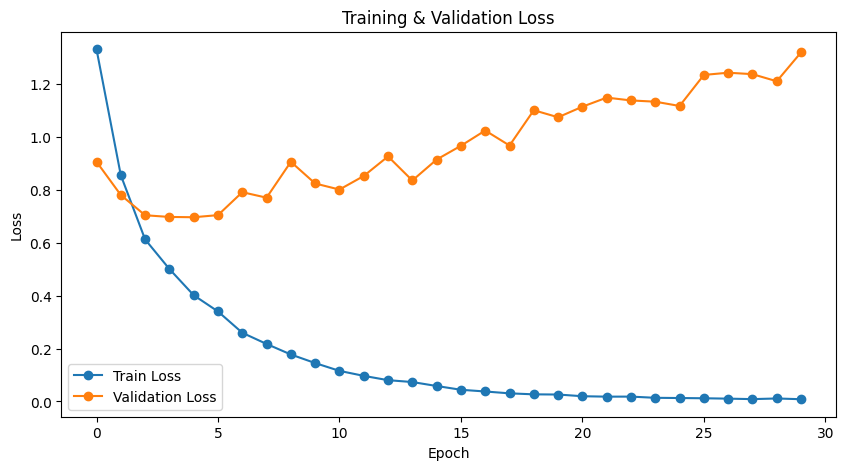

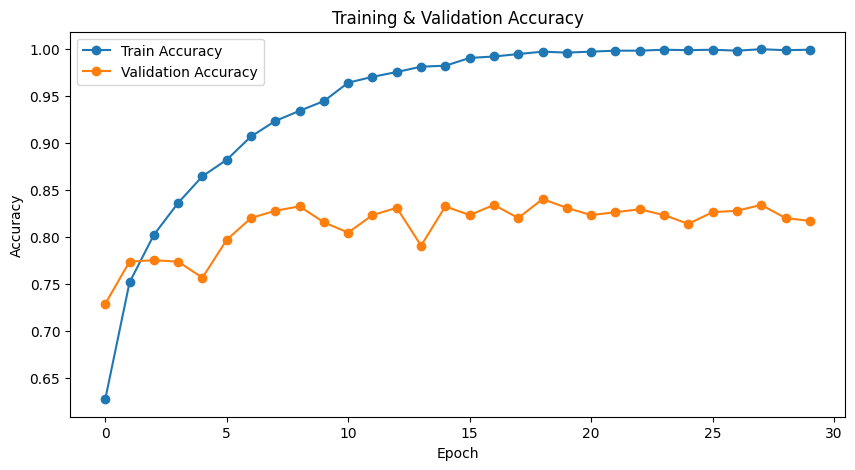

In [252]:
model = BGEClassifier(output_dim=len(label_encoder.classes_))
results = train_model(model, train_loader, val_loader, num_epochs=30, learning_rate=0.0001)

In [256]:
model_args = {
    'input_dim': 1024,  
    'output_dim': 5      
}

checkpoint_path = "checkpoints/model_BGE_FC1024-custom-5_lr0.0001_epoch7.pth"

model = BGEClassifier(**model_args)
model.load_state_dict(torch.load(checkpoint_path, map_location='cpu'))
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


C:\Users\Bruce Lan\AppData\Local\Temp\ipykernel_28580\2285319411.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path, map_lo

BGEClassifier(
  (classifier): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    (2): GELU(approximate='none')
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=128, bias=True)
    (5): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (6): GELU(approximate='none')
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=128, out_features=5, bias=True)
  )
)

                       precision    recall  f1-score   support

alcohol/entertainment       0.54      0.78      0.64        36
             clothing       0.88      0.65      0.75        43
                 food       0.90      0.89      0.89       429
      home/appliances       0.65      0.62      0.63       117
                other       0.00      0.00      0.00         0
            transport       0.79      0.90      0.84        21

             accuracy                           0.82       646
            macro avg       0.63      0.64      0.63       646
         weighted avg       0.83      0.82      0.82       646


✅ Overall Accuracy on Test Set: 0.8204


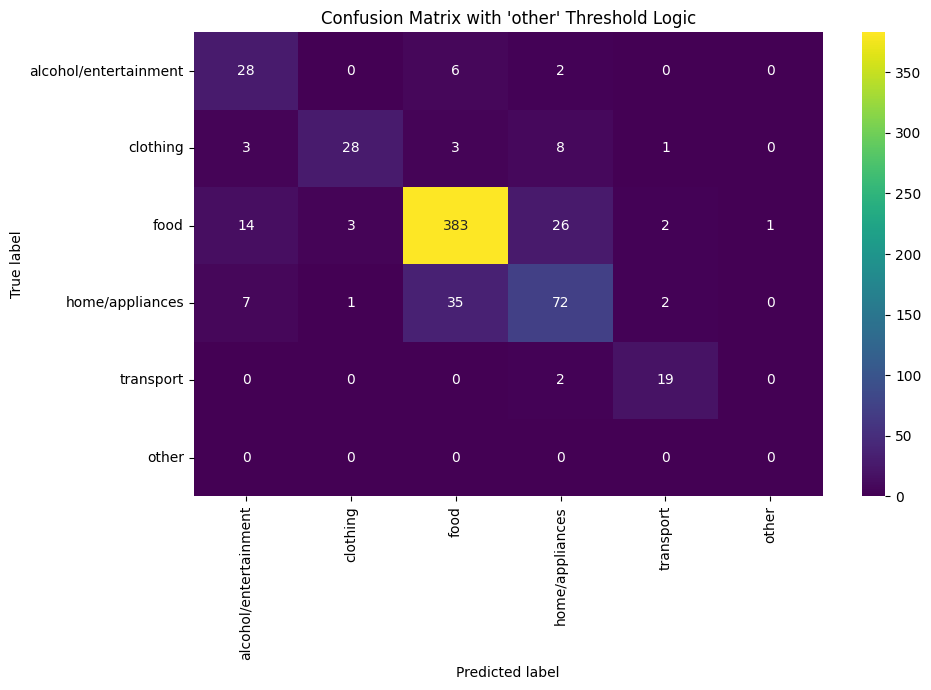

In [264]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare test data
test_texts = df_test["item"].tolist()
true_labels = df_test["label"].tolist()

# Dataset class
class ReceiptDataset(Dataset):
    def __init__(self, texts, labels):
        self.embeddings = embedding_model.encode(texts, convert_to_tensor=True)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

# Create DataLoader
test_loader = DataLoader(ReceiptDataset(test_texts, true_labels), batch_size=16)

# Model evaluation
model.eval()
final_preds = []
predicted_probs = []

with torch.no_grad():
    for i, (inputs, _) in enumerate(test_loader):
        inputs = inputs.to(device)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)
        max_probs, preds = torch.max(probs, dim=1)

        for prob, pred in zip(max_probs, preds):
            if prob.item() < 0.35:
                final_preds.append("other")
            else:
                label_str = label_encoder.inverse_transform([pred.item()])[0]
                final_preds.append(label_str)
            predicted_probs.append(prob.item())

# Convert true labels to string
true_label_names = label_encoder.inverse_transform(true_labels)

# Classification report
print(classification_report(true_label_names, final_preds, zero_division=0))

# Accuracy
correct = sum(t == p for t, p in zip(true_label_names, final_preds))
total = len(true_label_names)
accuracy = correct / total
print(f"\n✅ Overall Accuracy on Test Set: {accuracy:.4f}")

# Confusion Matrix
real_labels = label_encoder.classes_.tolist()
if "other" in final_preds:
    real_labels.append("other")

cm = confusion_matrix(true_label_names, final_preds, labels=real_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=real_labels,
            yticklabels=real_labels)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix with 'other' Threshold Logic")
plt.tight_layout()
plt.show()

In [265]:
# Assuming test_loader, model, label_encoder, and device have already been set up

# Create a list to store each prediction
detailed_predictions = []

model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    for i in range(0, len(test_texts), 16):  # Process in batches of 16
        batch_texts = test_texts[i:i+16]
        inputs = embedding_model.encode(batch_texts, convert_to_tensor=True).to(device)
        
        # Get model output
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)  # Get probability distribution
        max_probs, preds = torch.max(probs, dim=1)  # Get the maximum probability and corresponding predicted class

        # Save the results for each item
        # Save the results for each item
        for idx, (prob, pred) in enumerate(zip(max_probs, preds)):
            true_label_idx = true_labels[i + idx]
            true_label = label_encoder.inverse_transform([true_label_idx])[0]  # Convert the true label from number to category name
            item_name = batch_texts[idx]
            predicted_prob = prob.item()

            if predicted_prob < 0.4:
                predicted_label = "other"
            else:
                predicted_label = label_encoder.inverse_transform([pred.item()])[0]

            detailed_predictions.append([item_name, true_label, predicted_label, predicted_prob])


# Save the results as a DataFrame and display
prediction_df = pd.DataFrame(detailed_predictions, columns=["Item", "True Label", "Predicted Label", "Predicted Probability"])

# Print the first few prediction results for inspection
print(prediction_df.head())

# If you want to save to a CSV file
prediction_df.to_csv("detailed_predictions_with_item.csv", index=False)


                   Item True Label  Predicted Label  Predicted Probability
0  ad-ss slim strp patc   clothing  home/appliances               0.833300
1        ricotta cheese       food             food               0.985387
2          beef roundsf       food             food               0.975020
3            mm's jeans   clothing         clothing               0.951788
4             banana ec       food             food               0.973649
